<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/SSURGO_openlandmap_predictions_maui_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 106.8 MB/s eta 0:00:00


In [2]:
import rasterio
import geopandas as gpd

In [3]:
# # Check projections
# print("=" * 60)
# print("PROJECTION CHECK")
# print("=" * 60)

# # 1. OpenLandMap raster
# with rasterio.open('/content/SOC_Hawaii_OpenLandMap_0-20cm.tif') as src:
#     print("\n1. OpenLandMap Raster:")
#     print(f"   CRS: {src.crs}")
#     print(f"   Bounds: {src.bounds}")
#     print(f"   Shape: {src.shape}")
#     print(f"   Resolution: {src.res}")

# # 2. SSURGO geopackage
# ssurgo = gpd.read_file('/content/SSURGO_HI_SOC_0-20cm.gpkg')
# print("\n2. SSURGO Geopackage:")
# print(f"   CRS: {ssurgo.crs}")
# print(f"   Bounds: {ssurgo.total_bounds}")
# print(f"   Records: {len(ssurgo)}")

# # 3. Your carbon predictions
# carbon_preds = gpd.read_file('/content/maui_carbon_analysis_polyids_4326.gpkg')
# print("\n3. Your Carbon Predictions:")
# print(f"   CRS: {carbon_preds.crs}")
# print(f"   Bounds: {carbon_preds.total_bounds}")
# print(f"   Records: {len(carbon_preds)}")



PROJECTION CHECK

1. OpenLandMap Raster:
   CRS: EPSG:4326
   Bounds: BoundingBox(left=-178.44366877, bottom=18.864476433, right=-154.755094728, top=28.519119949)
   Shape: (4299, 10548)
   Resolution: (0.0022457882102768297, 0.002245788210281461)

2. SSURGO Geopackage:
   CRS: EPSG:4326
   Bounds: [-159.78823076   18.91081041 -154.80670909   22.23513989]
   Records: 23257

3. Your Carbon Predictions:
   CRS: EPSG:4326
   Bounds: [-156.47768833   20.73603799 -156.23210905   20.9222126 ]
   Records: 284627


In [4]:
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import geopandas as gpd
# import numpy as np

# target_crs = 'EPSG:32604'

# # 1. Read and reproject your carbon predictions to EPSG:32604
# carbon_preds = gpd.read_file('/content/maui_carbon_analysis_polyids_4326.gpkg')
# carbon_preds_utm = carbon_preds.to_crs(target_crs)
# print(f"✓ Reprojected carbon predictions to {target_crs}")
# print(f"  Records: {len(carbon_preds_utm)}")

# # 2. Reproject SSURGO to EPSG:32604
# ssurgo = gpd.read_file('/content/SSURGO_HI_SOC_0-20cm.gpkg')
# ssurgo_utm = ssurgo.to_crs(target_crs)
# print(f"✓ Reprojected SSURGO to {target_crs}")
# print(f"  Records: {len(ssurgo_utm)}")

# # 3. Reproject OpenLandMap raster to EPSG:32604
# with rasterio.open('/content/SOC_Hawaii_OpenLandMap_0-20cm.tif') as src:
#     # Calculate transform and dimensions for target CRS
#     transform, width, height = calculate_default_transform(
#         src.crs, target_crs, src.width, src.height, *src.bounds
#     )

#     # Set up output raster metadata
#     kwargs = src.meta.copy()
#     kwargs.update({
#         'crs': target_crs,
#         'transform': transform,
#         'width': width,
#         'height': height
#     })

#     # Reproject
#     with rasterio.open('/content/SOC_Hawaii_OpenLandMap_0-20cm_UTM.tif', 'w', **kwargs) as dst:
#         reproject(
#             source=rasterio.band(src, 1),
#             destination=rasterio.band(dst, 1),
#             src_transform=src.transform,
#             src_crs=src.crs,
#             dst_transform=transform,
#             dst_crs=target_crs,
#             resampling=Resampling.bilinear
#         )

# print(f"✓ Reprojected OpenLandMap to {target_crs}")

# # Check what columns are in carbon predictions
# print(f"\nCarbon prediction columns:")
# date_cols = [col for col in carbon_preds_utm.columns if col.startswith('d_')]
# print(f"  Date columns: {len(date_cols)}")
# if date_cols:
#     print(f"  First few: {date_cols[:5]}")

# print("\n" + "="*60)
# print("ALL DATASETS NOW IN EPSG:32604 (UTM Zone 4N)")
# print("="*60)

✓ Reprojected carbon predictions to EPSG:32604
  Records: 284627
✓ Reprojected SSURGO to EPSG:32604
  Records: 23257
✓ Reprojected OpenLandMap to EPSG:32604

Carbon prediction columns:
  Date columns: 98
  First few: ['d_20161217', 'd_20170116', 'd_20170215', 'd_20170317', 'd_20170416']

ALL DATASETS NOW IN EPSG:32604 (UTM Zone 4N)


In [5]:
!pip install rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 127.4 MB/s eta 0:00:00


In [7]:
# import pandas as pd
# import numpy as np
# from rasterstats import zonal_stats

# # Get all the date columns (those starting with 'd_') EXCEPT d_20161217
# date_columns = [col for col in carbon_preds_utm.columns if col.startswith('d_') and col != 'd_20161217']
# print(f"Found {len(date_columns)} date columns (excluding d_20161217)")

# # Calculate mean SOC across all dates
# carbon_preds_utm['soc_mean'] = carbon_preds_utm[date_columns].mean(axis=1)

# print(f"\nYour Carbon Predictions - Mean SOC (%):")
# print(carbon_preds_utm['soc_mean'].describe())

# # Extract SSURGO values
# print("\n" + "="*60)
# print("EXTRACTING VALUES AT YOUR POLYGON LOCATIONS")
# print("="*60)

# # Verify CRS match
# print(f"Carbon predictions CRS: {carbon_preds_utm.crs}")
# print(f"SSURGO CRS: {ssurgo_utm.crs}")

# # Spatial join to get SSURGO values
# carbon_with_ssurgo = gpd.sjoin(
#     carbon_preds_utm[['geometry', 'soc_mean']],
#     ssurgo_utm[['geometry', 'soc_0_20cm_pct']],
#     how='left',
#     predicate='intersects'
# )

# # Group by original polygon (in case multiple SSURGO polygons intersect)
# carbon_comparison = carbon_preds_utm[['geometry', 'soc_mean']].copy()
# carbon_comparison['ssurgo_soc'] = carbon_with_ssurgo.groupby(level=0)['soc_0_20cm_pct'].mean()

# print(f"Matched with SSURGO: {carbon_comparison['ssurgo_soc'].notna().sum()} / {len(carbon_comparison)}")

# # Extract OpenLandMap values using zonal stats
# olm_stats = zonal_stats(
#     carbon_comparison,
#     '/content/SOC_Hawaii_OpenLandMap_0-20cm_UTM.tif',
#     stats=['mean'],
#     nodata=0
# )

# # Convert OLM from x5 g/kg to % and add to dataframe
# carbon_comparison['olm_soc'] = [s['mean']/2 if s['mean'] is not None else np.nan for s in olm_stats]

# print(f"Matched with OpenLandMap: {carbon_comparison['olm_soc'].notna().sum()} / {len(carbon_comparison)}")

# # Summary statistics for all three
# print("\n" + "="*60)
# print("COMPARISON SUMMARY")
# print("="*60)

# for col, name in [('soc_mean', 'Your Predictions'),
#                    ('ssurgo_soc', 'SSURGO'),
#                    ('olm_soc', 'OpenLandMap')]:
#     print(f"\n{name}:")
#     print(f"  Count: {carbon_comparison[col].notna().sum()}")
#     print(f"  Mean: {carbon_comparison[col].mean():.2f}%")
#     print(f"  Median: {carbon_comparison[col].median():.2f}%")
#     print(f"  Std: {carbon_comparison[col].std():.2f}%")
#     print(f"  Range: {carbon_comparison[col].min():.2f} - {carbon_comparison[col].max():.2f}%")

# # Save comparison
# carbon_comparison.to_file('/content/carbon_comparison_all_sources.gpkg', driver='GPKG')
# print(f"\n✓ Saved comparison to: /content/carbon_comparison_all_sources.gpkg")

Found 97 date columns (excluding d_20161217)

Your Carbon Predictions - Mean SOC (%):
count    284627.000000
mean          3.705882
std           1.712400
min           0.077127
25%           2.408279
50%           3.202169
75%           4.586346
max          16.679916
Name: soc_mean, dtype: float64

EXTRACTING VALUES AT YOUR POLYGON LOCATIONS
Carbon predictions CRS: EPSG:32604
SSURGO CRS: EPSG:32604
Matched with SSURGO: 284410 / 284627
Matched with OpenLandMap: 284604 / 284627

COMPARISON SUMMARY

Your Predictions:
  Count: 284627
  Mean: 3.71%
  Median: 3.20%
  Std: 1.71%
  Range: 0.08 - 16.68%

SSURGO:
  Count: 284410
  Mean: 2.74%
  Median: 1.74%
  Std: 2.75%
  Range: 0.30 - 13.28%

OpenLandMap:
  Count: 284604
  Mean: 2.68%
  Median: 2.00%
  Std: 1.56%
  Range: 1.00 - 12.00%

✓ Saved comparison to: /content/carbon_comparison_all_sources.gpkg


Polygons with all three data sources: 284387 / 284627

SUMMARY STATISTICS TABLE
       Transformer Predictions     SSURGO  OpenLandMap
count                284627.00  284410.00    284604.00
mean                      3.71       2.74         2.68
std                       1.71       2.75         1.56
min                       0.08       0.30         1.00
25%                       2.41       1.45         1.50
50%                       3.20       1.74         2.00
75%                       4.59       2.84         3.00
max                      16.68      13.28        12.00

✓ Saved to: soc_summary_statistics.csv

CORRELATION ANALYSIS (Pearson's r)
  Dataset 1               Dataset 2      N     r p-value
     SSURGO Transformer Predictions 284410 0.741 <0.0001
OpenLandMap Transformer Predictions 284604 0.668 <0.0001
OpenLandMap                  SSURGO 284387 0.624 <0.0001

✓ Saved to: soc_correlations.csv

✓ Saved scatter plots to: soc_scatter_plots.png


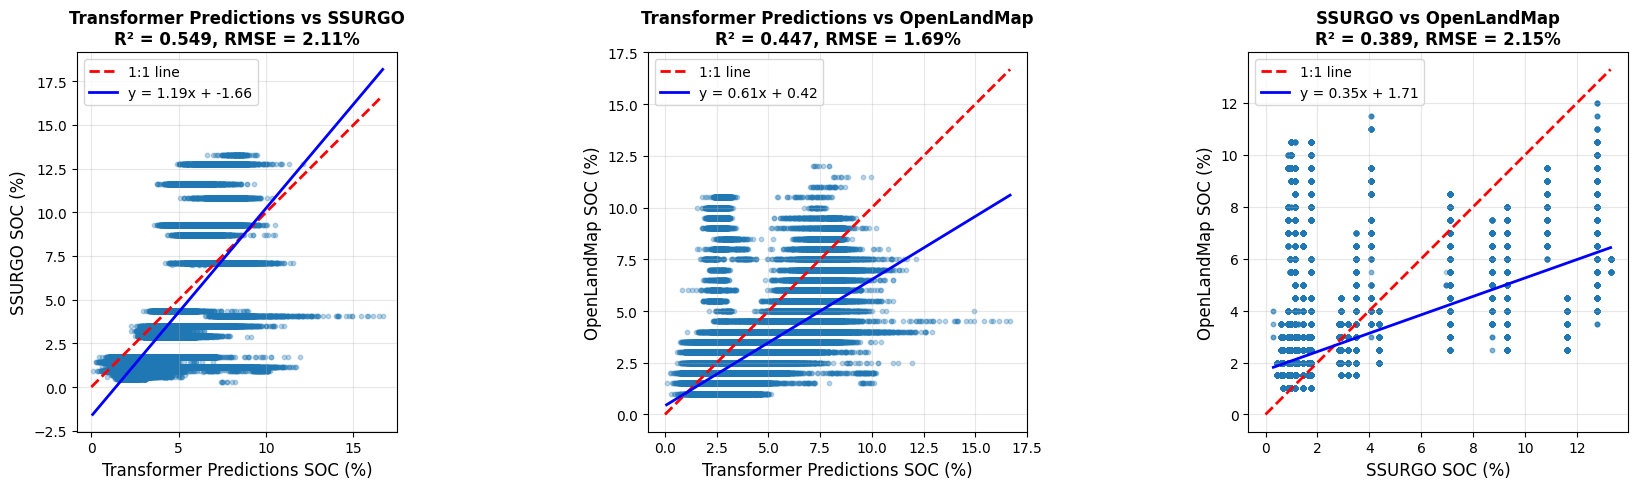

/tmp/ipython-input-242308292.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=['Transformer Predictions', 'SSURGO', 'OpenLandMap'],


✓ Saved boxplots to: soc_boxplots.png


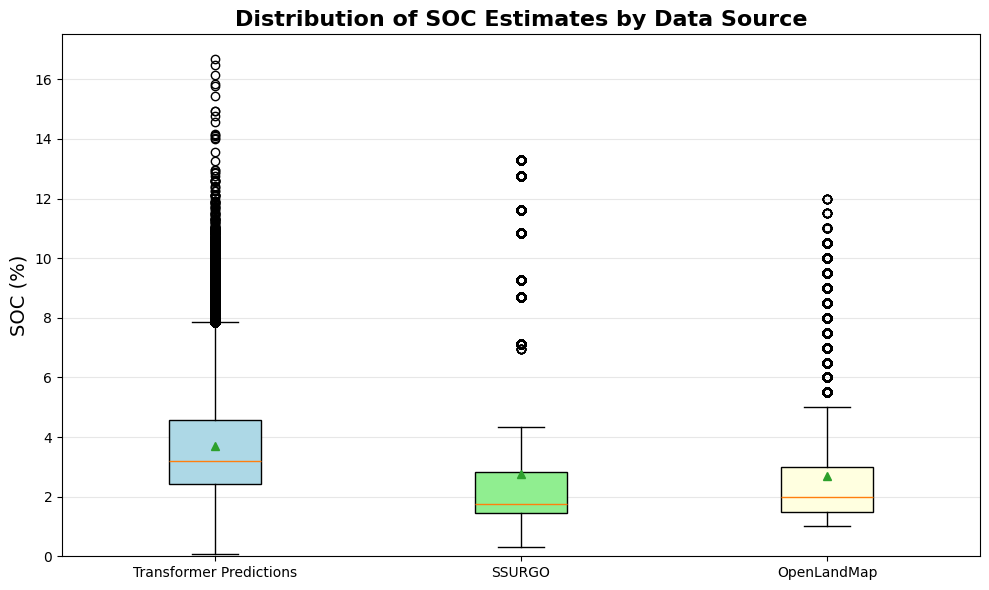

✓ Saved histograms to: soc_histograms.png


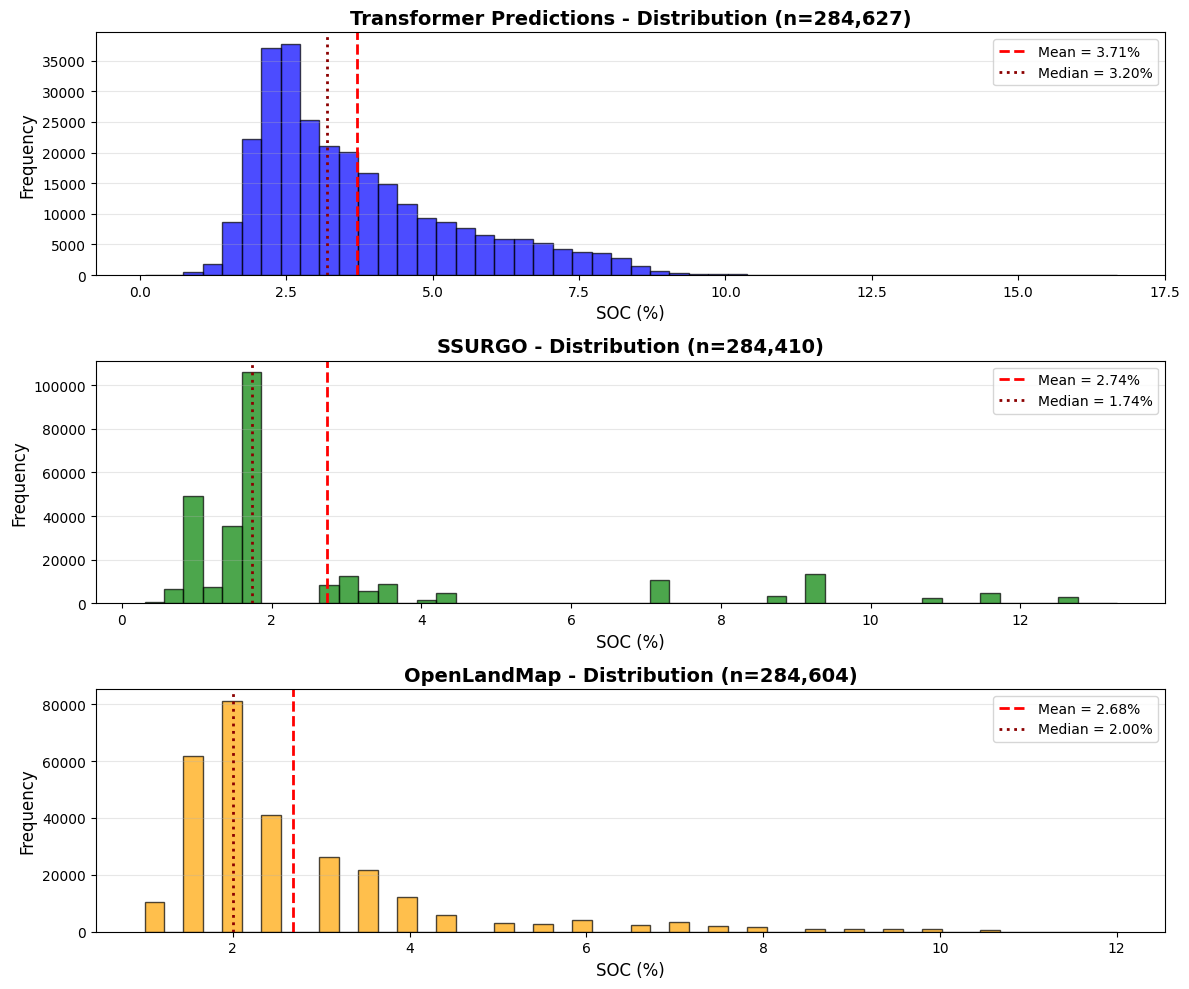

/tmp/ipython-input-242308292.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_complete['diff_yours_ssurgo'] = comp_complete['soc_mean'] - comp_complete['ssurgo_soc']
/tmp/ipython-input-242308292.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_complete['diff_yours_olm'] = comp_complete['soc_mean'] - comp_complete['olm_soc']


✓ Saved difference plots to: soc_differences.png


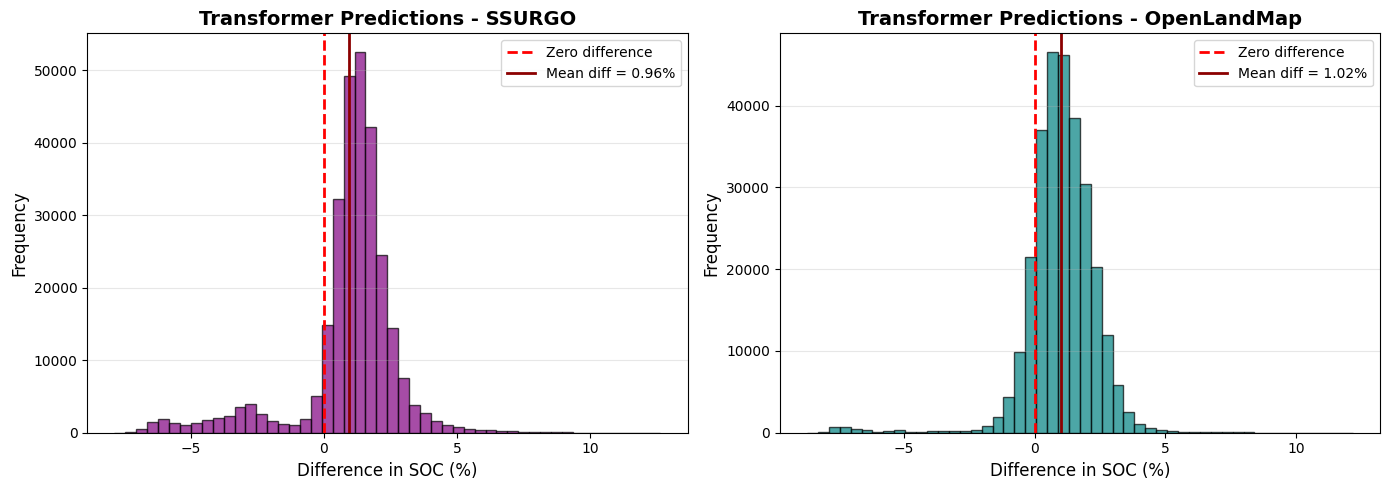


BIAS AND AGREEMENT METRICS
                            Comparison      N  Mean Bias (%)  RMSE (%)  MAE (%)
     Transformer Predictions vs SSURGO 284410          0.961     2.107    1.702
Transformer Predictions vs OpenLandMap 284604          1.023     1.686    1.307

✓ Saved to: soc_bias_metrics.csv

ALL ANALYSES COMPLETE!

Generated files:
  • soc_summary_statistics.csv
  • soc_correlations.csv
  • soc_scatter_plots.png
  • soc_boxplots.png
  • soc_histograms.png
  • soc_differences.png
  • soc_bias_metrics.csv


In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the comparison data
carbon_comparison = gpd.read_file('/content/carbon_comparison_all_sources.gpkg')

# Remove geometry for easier manipulation
comp_df = pd.DataFrame(carbon_comparison.drop(columns='geometry'))

# Filter to only polygons with all three data sources
comp_complete = comp_df.dropna(subset=['soc_mean', 'ssurgo_soc', 'olm_soc'])
print(f"Polygons with all three data sources: {len(comp_complete)} / {len(comp_df)}")

# ============================================================
# 1. SUMMARY STATISTICS TABLE
# ============================================================
summary_stats = pd.DataFrame({
    'Transformer Predictions': comp_df['soc_mean'].describe(),
    'SSURGO': comp_df['ssurgo_soc'].describe(),
    'OpenLandMap': comp_df['olm_soc'].describe()
}).round(2)

print("\n" + "="*60)
print("SUMMARY STATISTICS TABLE")
print("="*60)
print(summary_stats)

# Save as CSV
summary_stats.to_csv('/content/soc_summary_statistics.csv')
print("\n✓ Saved to: soc_summary_statistics.csv")

# ============================================================
# 2. CORRELATION ANALYSIS
# ============================================================
print("\n" + "="*60)
print("CORRELATION ANALYSIS (Pearson's r)")
print("="*60)

correlations = []
for dataset1, col1 in [('Transformer Predictions', 'soc_mean'),
                        ('SSURGO', 'ssurgo_soc'),
                        ('OpenLandMap', 'olm_soc')]:
    for dataset2, col2 in [('Transformer Predictions', 'soc_mean'),
                            ('SSURGO', 'ssurgo_soc'),
                            ('OpenLandMap', 'olm_soc')]:
        if dataset1 < dataset2:  # Only compute once per pair
            valid = comp_df[[col1, col2]].dropna()
            if len(valid) > 0:
                r, p = stats.pearsonr(valid[col1], valid[col2])
                correlations.append({
                    'Dataset 1': dataset1,
                    'Dataset 2': dataset2,
                    'N': len(valid),
                    'r': round(r, 3),
                    'p-value': f"{p:.4f}" if p >= 0.0001 else "<0.0001"
                })

corr_df = pd.DataFrame(correlations)
print(corr_df.to_string(index=False))
corr_df.to_csv('/content/soc_correlations.csv', index=False)
print("\n✓ Saved to: soc_correlations.csv")

# ============================================================
# 3. SCATTER PLOTS WITH REGRESSION
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    ('soc_mean', 'ssurgo_soc', 'Transformer Predictions', 'SSURGO'),
    ('soc_mean', 'olm_soc', 'Transformer Predictions', 'OpenLandMap'),
    ('ssurgo_soc', 'olm_soc', 'SSURGO', 'OpenLandMap')
]

for idx, (x_col, y_col, x_label, y_label) in enumerate(comparisons):
    ax = axes[idx]

    # Get valid data
    valid = comp_df[[x_col, y_col]].dropna()

    # Scatter plot
    ax.scatter(valid[x_col], valid[y_col], alpha=0.3, s=10)

    # 1:1 line
    max_val = max(valid[x_col].max(), valid[y_col].max())
    ax.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='1:1 line')

    # Regression line
    z = np.polyfit(valid[x_col], valid[y_col], 1)
    p = np.poly1d(z)
    ax.plot(valid[x_col].sort_values(), p(valid[x_col].sort_values()),
            'b-', linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

    # Calculate R² and RMSE
    r, _ = stats.pearsonr(valid[x_col], valid[y_col])
    rmse = np.sqrt(np.mean((valid[x_col] - valid[y_col])**2))

    ax.set_xlabel(f'{x_label} SOC (%)', fontsize=12)
    ax.set_ylabel(f'{y_label} SOC (%)', fontsize=12)
    ax.set_title(f'{x_label} vs {y_label}\nR² = {r**2:.3f}, RMSE = {rmse:.2f}%',
                 fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('/content/soc_scatter_plots.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved scatter plots to: soc_scatter_plots.png")
plt.show()

# ============================================================
# 4. DISTRIBUTION COMPARISON - BOX PLOTS
# ============================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for boxplot
box_data = [
    comp_df['soc_mean'].dropna(),
    comp_df['ssurgo_soc'].dropna(),
    comp_df['olm_soc'].dropna()
]

bp = ax.boxplot(box_data, labels=['Transformer Predictions', 'SSURGO', 'OpenLandMap'],
                patch_artist=True, showmeans=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('SOC (%)', fontsize=14)
ax.set_title('Distribution of SOC Estimates by Data Source', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('/content/soc_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Saved boxplots to: soc_boxplots.png")
plt.show()

# ============================================================
# 5. DISTRIBUTION COMPARISON - HISTOGRAMS
# ============================================================
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

datasets = [
    ('soc_mean', 'Transformer Predictions', 'blue'),
    ('ssurgo_soc', 'SSURGO', 'green'),
    ('olm_soc', 'OpenLandMap', 'orange')
]

for idx, (col, label, color) in enumerate(datasets):
    ax = axes[idx]
    data = comp_df[col].dropna()

    ax.hist(data, bins=50, alpha=0.7, color=color, edgecolor='black')
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {data.mean():.2f}%')
    ax.axvline(data.median(), color='darkred', linestyle=':', linewidth=2, label=f'Median = {data.median():.2f}%')

    ax.set_xlabel('SOC (%)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{label} - Distribution (n={len(data):,})', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/soc_histograms.png', dpi=300, bbox_inches='tight')
print("✓ Saved histograms to: soc_histograms.png")
plt.show()

# ============================================================
# 6. DIFFERENCE ANALYSIS
# ============================================================
comp_complete['diff_yours_ssurgo'] = comp_complete['soc_mean'] - comp_complete['ssurgo_soc']
comp_complete['diff_yours_olm'] = comp_complete['soc_mean'] - comp_complete['olm_soc']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Transformer Predictions - SSURGO
axes[0].hist(comp_complete['diff_yours_ssurgo'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
axes[0].axvline(comp_complete['diff_yours_ssurgo'].mean(), color='darkred', linestyle='-',
                linewidth=2, label=f"Mean diff = {comp_complete['diff_yours_ssurgo'].mean():.2f}%")
axes[0].set_xlabel('Difference in SOC (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Transformer Predictions - SSURGO', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Transformer Predictions - OpenLandMap
axes[1].hist(comp_complete['diff_yours_olm'], bins=50, alpha=0.7, color='teal', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
axes[1].axvline(comp_complete['diff_yours_olm'].mean(), color='darkred', linestyle='-',
                linewidth=2, label=f"Mean diff = {comp_complete['diff_yours_olm'].mean():.2f}%")
axes[1].set_xlabel('Difference in SOC (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Transformer Predictions - OpenLandMap', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/soc_differences.png', dpi=300, bbox_inches='tight')
print("✓ Saved difference plots to: soc_differences.png")
plt.show()

# ============================================================
# 7. BIAS AND AGREEMENT METRICS
# ============================================================
print("\n" + "="*60)
print("BIAS AND AGREEMENT METRICS")
print("="*60)

metrics = []
for comparison, col1, col2 in [
    ('Transformer Predictions vs SSURGO', 'soc_mean', 'ssurgo_soc'),
    ('Transformer Predictions vs OpenLandMap', 'soc_mean', 'olm_soc')
]:
    valid = comp_df[[col1, col2]].dropna()

    bias = (valid[col1] - valid[col2]).mean()
    rmse = np.sqrt(np.mean((valid[col1] - valid[col2])**2))
    mae = np.mean(np.abs(valid[col1] - valid[col2]))

    metrics.append({
        'Comparison': comparison,
        'N': len(valid),
        'Mean Bias (%)': round(bias, 3),
        'RMSE (%)': round(rmse, 3),
        'MAE (%)': round(mae, 3)
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df.to_string(index=False))
metrics_df.to_csv('/content/soc_bias_metrics.csv', index=False)
print("\n✓ Saved to: soc_bias_metrics.csv")

print("\n" + "="*60)
print("ALL ANALYSES COMPLETE!")
print("="*60)
print("\nGenerated files:")
print("  • soc_summary_statistics.csv")
print("  • soc_correlations.csv")
print("  • soc_scatter_plots.png")
print("  • soc_boxplots.png")
print("  • soc_histograms.png")
print("  • soc_differences.png")
print("  • soc_bias_metrics.csv")


In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np
from rasterstats import zonal_stats

# Read and reproject all datasets
target_crs = 'EPSG:32604'

# 1. Carbon predictions (with polygonid)
carbon_preds = gpd.read_file('/content/maui_carbon_analysis_polyids_4326.gpkg')
carbon_preds_utm = carbon_preds.to_crs(target_crs)

# Get date columns and calculate mean (excluding d_20161217)
date_columns = [col for col in carbon_preds_utm.columns if col.startswith('d_') and col != 'd_20161217']
carbon_preds_utm['soc_mean'] = carbon_preds_utm[date_columns].mean(axis=1)

# 2. SSURGO
ssurgo = gpd.read_file('/content/SSURGO_HI_SOC_0-20cm.gpkg')
ssurgo_utm = ssurgo.to_crs(target_crs)

# 3. Extract SSURGO values (keeping polygonid)
carbon_with_ssurgo = gpd.sjoin(
    carbon_preds_utm[['geometry', 'soc_mean', 'polygonid']],
    ssurgo_utm[['geometry', 'soc_0_20cm_pct']],
    how='left',
    predicate='intersects'
)

# Create comparison dataframe with polygonid
carbon_comparison = carbon_preds_utm[['geometry', 'soc_mean', 'polygonid']].copy()
carbon_comparison['ssurgo_soc'] = carbon_with_ssurgo.groupby(level=0)['soc_0_20cm_pct'].mean()

print(f"Matched with SSURGO: {carbon_comparison['ssurgo_soc'].notna().sum()} / {len(carbon_comparison)}")

# 4. Extract OpenLandMap values
olm_stats = zonal_stats(
    carbon_comparison,
    '/content/SOC_Hawaii_OpenLandMap_0-20cm_UTM.tif',
    stats=['mean'],
    nodata=0
)

carbon_comparison['olm_soc'] = [s['mean']/2 if s['mean'] is not None else np.nan for s in olm_stats]

print(f"Matched with OpenLandMap: {carbon_comparison['olm_soc'].notna().sum()} / {len(carbon_comparison)}")

# Save point-level comparison WITH polygonid
carbon_comparison.to_file('/content/carbon_comparison_all_sources_with_polygonid.gpkg', driver='GPKG')
print(f"\n✓ Saved point-level comparison to: carbon_comparison_all_sources_with_polygonid.gpkg")

# Now aggregate to polygon level
polygon_comparison = carbon_comparison.groupby('polygonid').agg({
    'soc_mean': 'mean',
    'ssurgo_soc': 'mean',
    'olm_soc': 'mean'
}).reset_index()

print(f"\n{'='*60}")
print(f"POLYGON-LEVEL SUMMARY")
print(f"{'='*60}")
print(f"Total unique polygons: {len(polygon_comparison)}")
print(f"Polygons with SSURGO data: {polygon_comparison['ssurgo_soc'].notna().sum()}")
print(f"Polygons with OpenLandMap data: {polygon_comparison['olm_soc'].notna().sum()}")

# Save polygon-level comparison
polygon_comparison.to_csv('/content/polygon_level_comparison.csv', index=False)
print(f"\n✓ Saved polygon-level comparison to: polygon_level_comparison.csv")

print("\nPolygon-level SOC statistics (%):")
for col, name in [('soc_mean', 'Your Predictions'),
                   ('ssurgo_soc', 'SSURGO'),
                   ('olm_soc', 'OpenLandMap')]:
    print(f"\n{name}:")
    print(f"  Mean: {polygon_comparison[col].mean():.2f}%")
    print(f"  Median: {polygon_comparison[col].median():.2f}%")
    print(f"  Std: {polygon_comparison[col].std():.2f}%")

Matched with SSURGO: 284410 / 284627
Matched with OpenLandMap: 284604 / 284627

✓ Saved point-level comparison to: carbon_comparison_all_sources_with_polygonid.gpkg

POLYGON-LEVEL SUMMARY
Total unique polygons: 297
Polygons with SSURGO data: 297
Polygons with OpenLandMap data: 297

✓ Saved polygon-level comparison to: polygon_level_comparison.csv

Polygon-level SOC statistics (%):

Your Predictions:
  Mean: 4.01%
  Median: 3.92%
  Std: 1.37%

SSURGO:
  Mean: 2.87%
  Median: 1.74%
  Std: 2.36%

OpenLandMap:
  Mean: 2.64%
  Median: 2.47%
  Std: 1.02%


Polygons with all three data sources: 297 / 297

POLYGON-LEVEL SUMMARY STATISTICS
       Transformer Predictions  SSURGO  OpenLandMap
count                   297.00  297.00       297.00
mean                      4.01    2.87         2.64
std                       1.37    2.36         1.02
min                       1.87    0.51         1.14
25%                       2.84    1.64         1.97
50%                       3.92    1.74         2.47
75%                       4.88    2.92         3.00
max                      13.83   11.41         9.24

✓ Saved to: polygon_soc_summary_statistics.csv

CORRELATION ANALYSIS (Pearson's r)
  Dataset 1               Dataset 2   N     r    R² p-value
     SSURGO Transformer Predictions 297 0.664 0.441 <0.0001
OpenLandMap Transformer Predictions 297 0.573 0.328 <0.0001
OpenLandMap                  SSURGO 297 0.633 0.400 <0.0001

✓ Saved to: polygon_soc_correlations.csv

✓ Saved scatter plots to: polygon_soc_scatter_plots.png


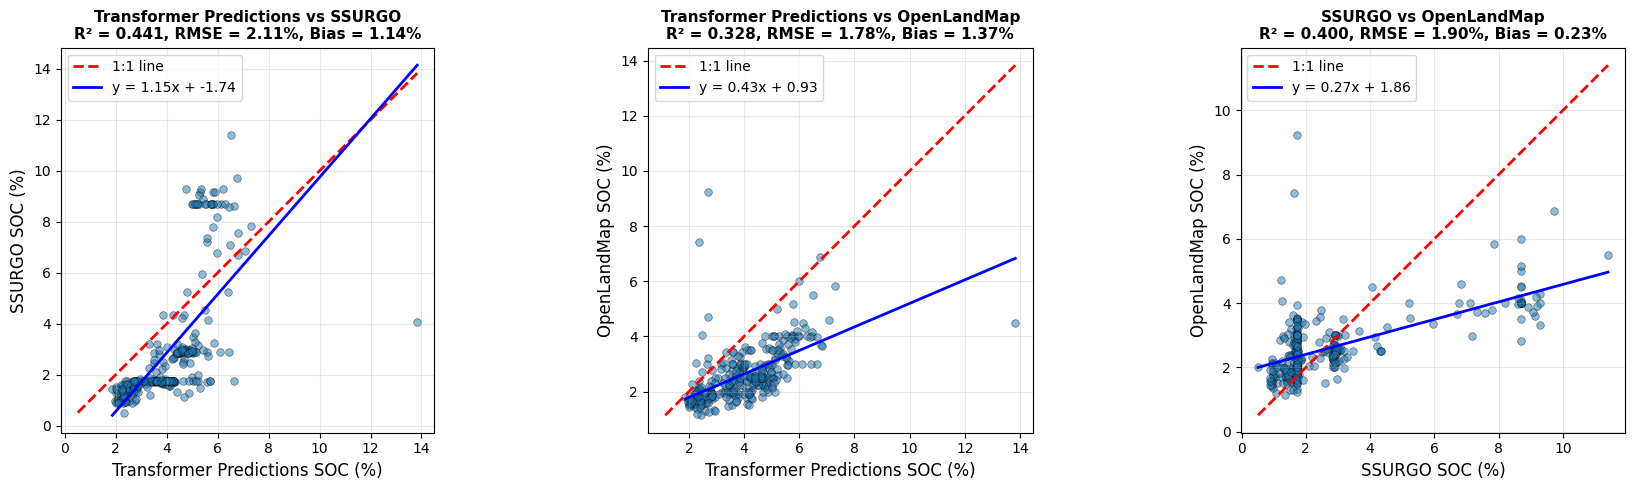

/tmp/ipython-input-584786857.py:127: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=['Transformer Predictions\n(n={})'.format(len(box_data[0])),


✓ Saved boxplots to: polygon_soc_boxplots.png


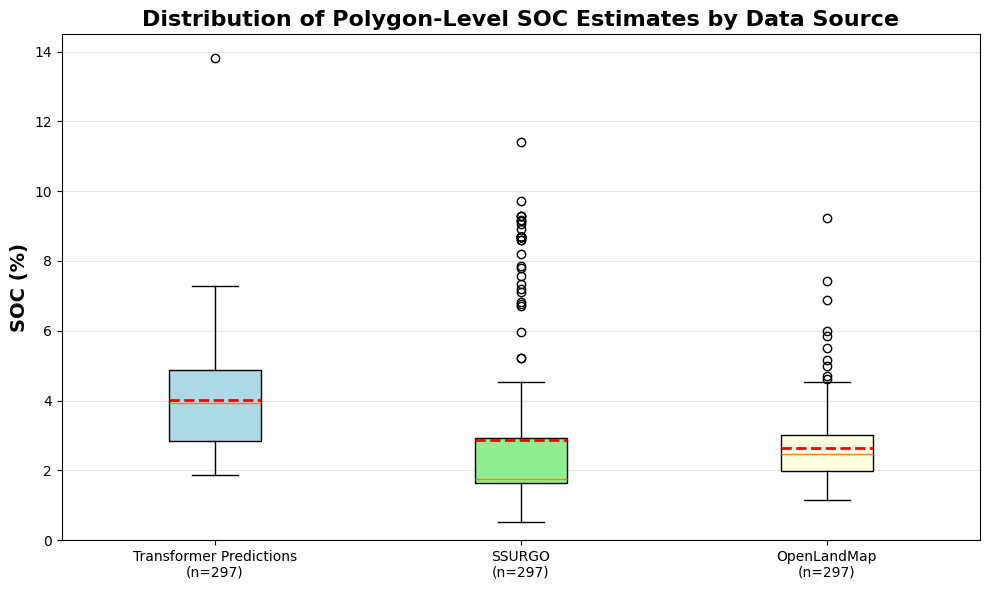

✓ Saved histograms to: polygon_soc_histograms.png


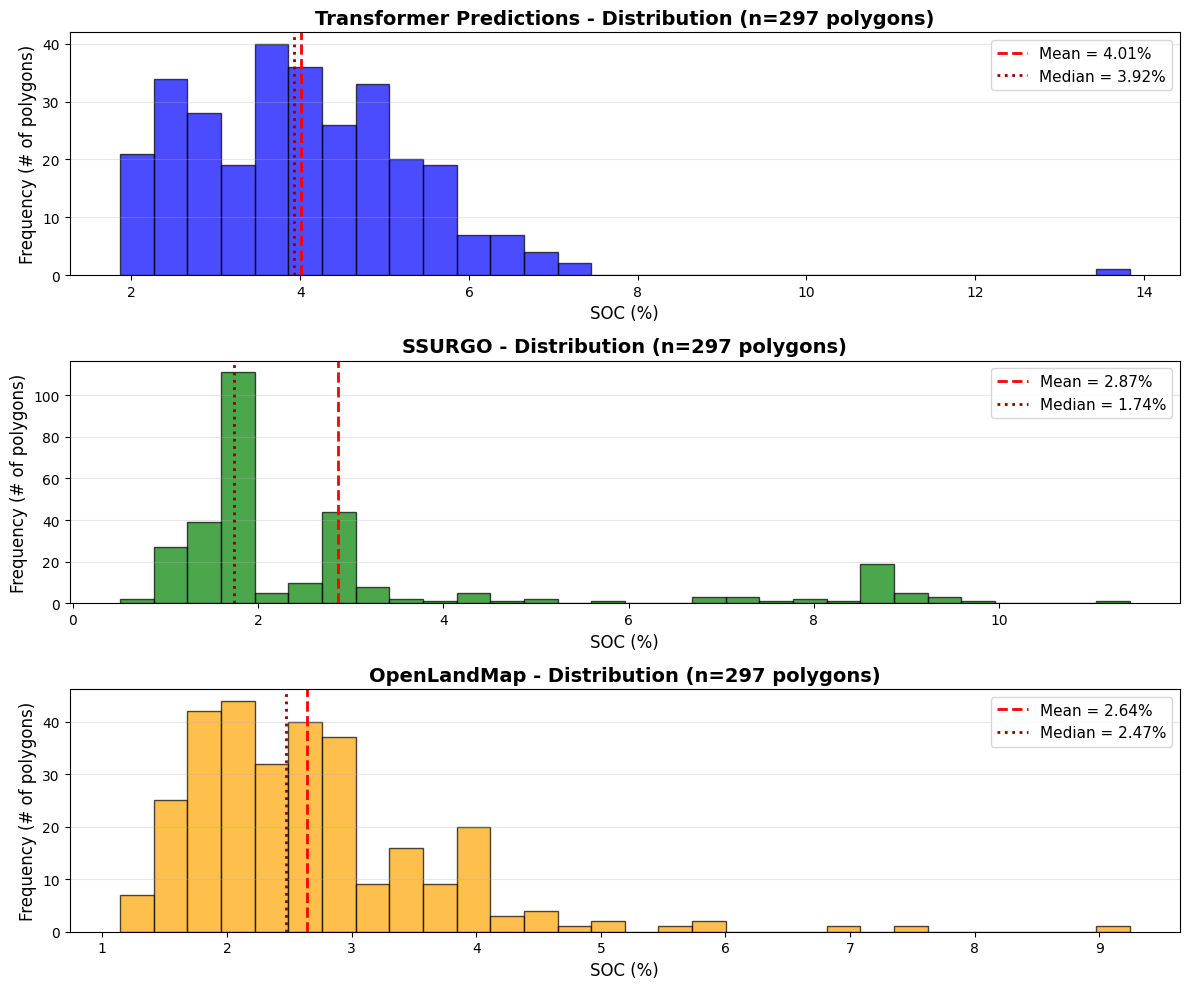

✓ Saved Bland-Altman plots to: polygon_soc_bland_altman.png


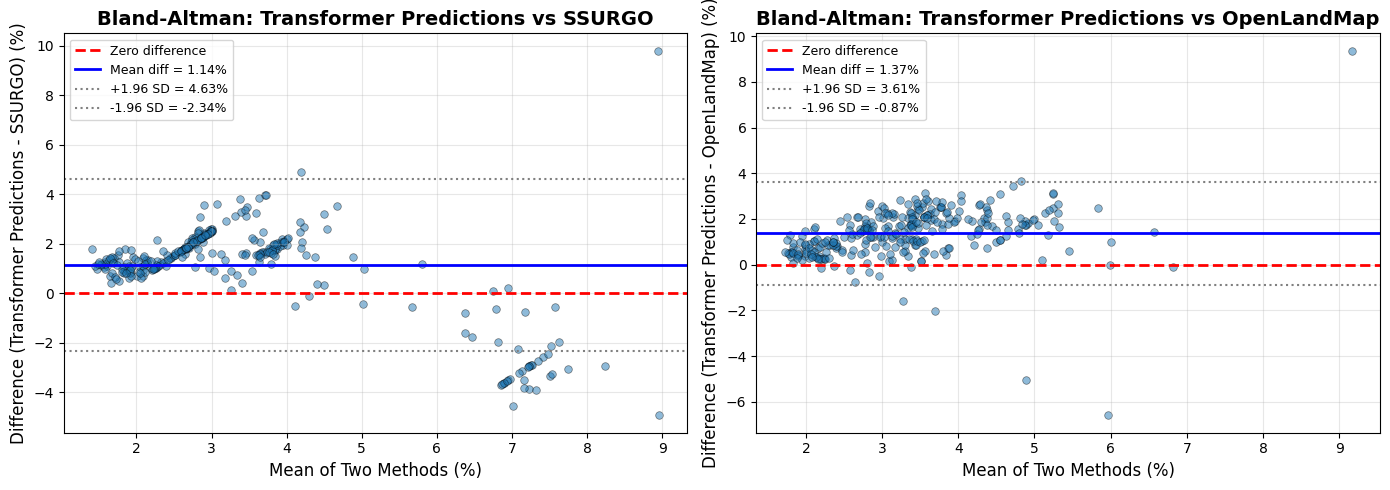


BIAS AND AGREEMENT METRICS (Polygon Level)
                            Comparison  N Polygons  Mean Bias (%)  RMSE (%)  MAE (%)  Pearson r    R²
     Transformer Predictions vs SSURGO         297          1.142     2.111    1.862      0.664 0.441
Transformer Predictions vs OpenLandMap         297          1.369     1.782    1.486      0.573 0.328

✓ Saved to: polygon_soc_bias_metrics.csv

POLYGON-LEVEL ANALYSIS COMPLETE!

Generated files:
  • polygon_soc_summary_statistics.csv
  • polygon_soc_correlations.csv
  • polygon_soc_scatter_plots.png
  • polygon_soc_boxplots.png
  • polygon_soc_histograms.png
  • polygon_soc_bland_altman.png
  • polygon_soc_bias_metrics.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the polygon-level comparison
polygon_comparison = pd.read_csv('/content/polygon_level_comparison.csv')

# Filter to only polygons with all three data sources
comp_complete = polygon_comparison.dropna(subset=['soc_mean', 'ssurgo_soc', 'olm_soc'])
print(f"Polygons with all three data sources: {len(comp_complete)} / {len(polygon_comparison)}")

# ============================================================
# 1. SUMMARY STATISTICS TABLE
# ============================================================
summary_stats = pd.DataFrame({
    'Transformer Predictions': polygon_comparison['soc_mean'].describe(),
    'SSURGO': polygon_comparison['ssurgo_soc'].describe(),
    'OpenLandMap': polygon_comparison['olm_soc'].describe()
}).round(2)

print("\n" + "="*60)
print("POLYGON-LEVEL SUMMARY STATISTICS")
print("="*60)
print(summary_stats)

# Save as CSV
summary_stats.to_csv('/content/polygon_soc_summary_statistics.csv')
print("\n✓ Saved to: polygon_soc_summary_statistics.csv")

# ============================================================
# 2. CORRELATION ANALYSIS
# ============================================================
print("\n" + "="*60)
print("CORRELATION ANALYSIS (Pearson's r)")
print("="*60)

correlations = []
for dataset1, col1 in [('Transformer Predictions', 'soc_mean'),
                        ('SSURGO', 'ssurgo_soc'),
                        ('OpenLandMap', 'olm_soc')]:
    for dataset2, col2 in [('Transformer Predictions', 'soc_mean'),
                            ('SSURGO', 'ssurgo_soc'),
                            ('OpenLandMap', 'olm_soc')]:
        if dataset1 < dataset2:  # Only compute once per pair
            valid = polygon_comparison[[col1, col2]].dropna()
            if len(valid) > 0:
                r, p = stats.pearsonr(valid[col1], valid[col2])
                correlations.append({
                    'Dataset 1': dataset1,
                    'Dataset 2': dataset2,
                    'N': len(valid),
                    'r': round(r, 3),
                    'R²': round(r**2, 3),
                    'p-value': f"{p:.4f}" if p >= 0.0001 else "<0.0001"
                })

corr_df = pd.DataFrame(correlations)
print(corr_df.to_string(index=False))
corr_df.to_csv('/content/polygon_soc_correlations.csv', index=False)
print("\n✓ Saved to: polygon_soc_correlations.csv")

# ============================================================
# 3. SCATTER PLOTS WITH REGRESSION
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    ('soc_mean', 'ssurgo_soc', 'Transformer Predictions', 'SSURGO'),
    ('soc_mean', 'olm_soc', 'Transformer Predictions', 'OpenLandMap'),
    ('ssurgo_soc', 'olm_soc', 'SSURGO', 'OpenLandMap')
]

for idx, (x_col, y_col, x_label, y_label) in enumerate(comparisons):
    ax = axes[idx]

    # Get valid data
    valid = polygon_comparison[[x_col, y_col]].dropna()

    # Scatter plot
    ax.scatter(valid[x_col], valid[y_col], alpha=0.5, s=30, edgecolors='black', linewidths=0.5)

    # 1:1 line
    max_val = max(valid[x_col].max(), valid[y_col].max())
    min_val = min(valid[x_col].min(), valid[y_col].min())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 line')

    # Regression line
    z = np.polyfit(valid[x_col], valid[y_col], 1)
    p = np.poly1d(z)
    x_line = np.linspace(valid[x_col].min(), valid[x_col].max(), 100)
    ax.plot(x_line, p(x_line), 'b-', linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

    # Calculate metrics
    r, _ = stats.pearsonr(valid[x_col], valid[y_col])
    rmse = np.sqrt(np.mean((valid[x_col] - valid[y_col])**2))
    bias = (valid[x_col] - valid[y_col]).mean()

    ax.set_xlabel(f'{x_label} SOC (%)', fontsize=12)
    ax.set_ylabel(f'{y_label} SOC (%)', fontsize=12)
    ax.set_title(f'{x_label} vs {y_label}\nR² = {r**2:.3f}, RMSE = {rmse:.2f}%, Bias = {bias:.2f}%',
                 fontsize=11, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    # Equal aspect ratio
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('/content/polygon_soc_scatter_plots.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved scatter plots to: polygon_soc_scatter_plots.png")
plt.show()

# ============================================================
# 4. DISTRIBUTION COMPARISON - BOX PLOTS
# ============================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for boxplot
box_data = [
    polygon_comparison['soc_mean'].dropna(),
    polygon_comparison['ssurgo_soc'].dropna(),
    polygon_comparison['olm_soc'].dropna()
]

bp = ax.boxplot(box_data, labels=['Transformer Predictions\n(n={})'.format(len(box_data[0])),
                                   'SSURGO\n(n={})'.format(len(box_data[1])),
                                   'OpenLandMap\n(n={})'.format(len(box_data[2]))],
                patch_artist=True, showmeans=True, meanline=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Make mean line more visible
for mean in bp['means']:
    mean.set_color('red')
    mean.set_linewidth(2)

ax.set_ylabel('SOC (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Polygon-Level SOC Estimates by Data Source', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('/content/polygon_soc_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Saved boxplots to: polygon_soc_boxplots.png")
plt.show()

# ============================================================
# 5. DISTRIBUTION COMPARISON - HISTOGRAMS
# ============================================================
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

datasets = [
    ('soc_mean', 'Transformer Predictions', 'blue'),
    ('ssurgo_soc', 'SSURGO', 'green'),
    ('olm_soc', 'OpenLandMap', 'orange')
]

for idx, (col, label, color) in enumerate(datasets):
    ax = axes[idx]
    data = polygon_comparison[col].dropna()

    ax.hist(data, bins=30, alpha=0.7, color=color, edgecolor='black')
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {data.mean():.2f}%')
    ax.axvline(data.median(), color='darkred', linestyle=':', linewidth=2, label=f'Median = {data.median():.2f}%')

    ax.set_xlabel('SOC (%)', fontsize=12)
    ax.set_ylabel('Frequency (# of polygons)', fontsize=12)
    ax.set_title(f'{label} - Distribution (n={len(data)} polygons)', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/polygon_soc_histograms.png', dpi=300, bbox_inches='tight')
print("✓ Saved histograms to: polygon_soc_histograms.png")
plt.show()

# ============================================================
# 6. DIFFERENCE ANALYSIS (BLAND-ALTMAN STYLE)
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Transformer Predictions vs SSURGO
valid = polygon_comparison[['soc_mean', 'ssurgo_soc']].dropna()
mean_vals = (valid['soc_mean'] + valid['ssurgo_soc']) / 2
diff_vals = valid['soc_mean'] - valid['ssurgo_soc']
mean_diff = diff_vals.mean()
std_diff = diff_vals.std()

axes[0].scatter(mean_vals, diff_vals, alpha=0.5, s=30, edgecolors='black', linewidths=0.5)
axes[0].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
axes[0].axhline(mean_diff, color='blue', linestyle='-', linewidth=2, label=f'Mean diff = {mean_diff:.2f}%')
axes[0].axhline(mean_diff + 1.96*std_diff, color='gray', linestyle=':', linewidth=1.5, label=f'+1.96 SD = {mean_diff + 1.96*std_diff:.2f}%')
axes[0].axhline(mean_diff - 1.96*std_diff, color='gray', linestyle=':', linewidth=1.5, label=f'-1.96 SD = {mean_diff - 1.96*std_diff:.2f}%')
axes[0].set_xlabel('Mean of Two Methods (%)', fontsize=12)
axes[0].set_ylabel('Difference (Transformer Predictions - SSURGO) (%)', fontsize=12)
axes[0].set_title('Bland-Altman: Transformer Predictions vs SSURGO', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Transformer Predictions vs OpenLandMap
valid = polygon_comparison[['soc_mean', 'olm_soc']].dropna()
mean_vals = (valid['soc_mean'] + valid['olm_soc']) / 2
diff_vals = valid['soc_mean'] - valid['olm_soc']
mean_diff = diff_vals.mean()
std_diff = diff_vals.std()

axes[1].scatter(mean_vals, diff_vals, alpha=0.5, s=30, edgecolors='black', linewidths=0.5)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
axes[1].axhline(mean_diff, color='blue', linestyle='-', linewidth=2, label=f'Mean diff = {mean_diff:.2f}%')
axes[1].axhline(mean_diff + 1.96*std_diff, color='gray', linestyle=':', linewidth=1.5, label=f'+1.96 SD = {mean_diff + 1.96*std_diff:.2f}%')
axes[1].axhline(mean_diff - 1.96*std_diff, color='gray', linestyle=':', linewidth=1.5, label=f'-1.96 SD = {mean_diff - 1.96*std_diff:.2f}%')
axes[1].set_xlabel('Mean of Two Methods (%)', fontsize=12)
axes[1].set_ylabel('Difference (Transformer Predictions - OpenLandMap) (%)', fontsize=12)
axes[1].set_title('Bland-Altman: Transformer Predictions vs OpenLandMap', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/polygon_soc_bland_altman.png', dpi=300, bbox_inches='tight')
print("✓ Saved Bland-Altman plots to: polygon_soc_bland_altman.png")
plt.show()

# ============================================================
# 7. BIAS AND AGREEMENT METRICS
# ============================================================
print("\n" + "="*60)
print("BIAS AND AGREEMENT METRICS (Polygon Level)")
print("="*60)

metrics = []
for comparison, col1, col2 in [
    ('Transformer Predictions vs SSURGO', 'soc_mean', 'ssurgo_soc'),
    ('Transformer Predictions vs OpenLandMap', 'soc_mean', 'olm_soc')
]:
    valid = polygon_comparison[[col1, col2]].dropna()

    bias = (valid[col1] - valid[col2]).mean()
    rmse = np.sqrt(np.mean((valid[col1] - valid[col2])**2))
    mae = np.mean(np.abs(valid[col1] - valid[col2]))
    r, _ = stats.pearsonr(valid[col1], valid[col2])

    metrics.append({
        'Comparison': comparison,
        'N Polygons': len(valid),
        'Mean Bias (%)': round(bias, 3),
        'RMSE (%)': round(rmse, 3),
        'MAE (%)': round(mae, 3),
        'Pearson r': round(r, 3),
        'R²': round(r**2, 3)
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df.to_string(index=False))
metrics_df.to_csv('/content/polygon_soc_bias_metrics.csv', index=False)



✓ Saved side-by-side maps


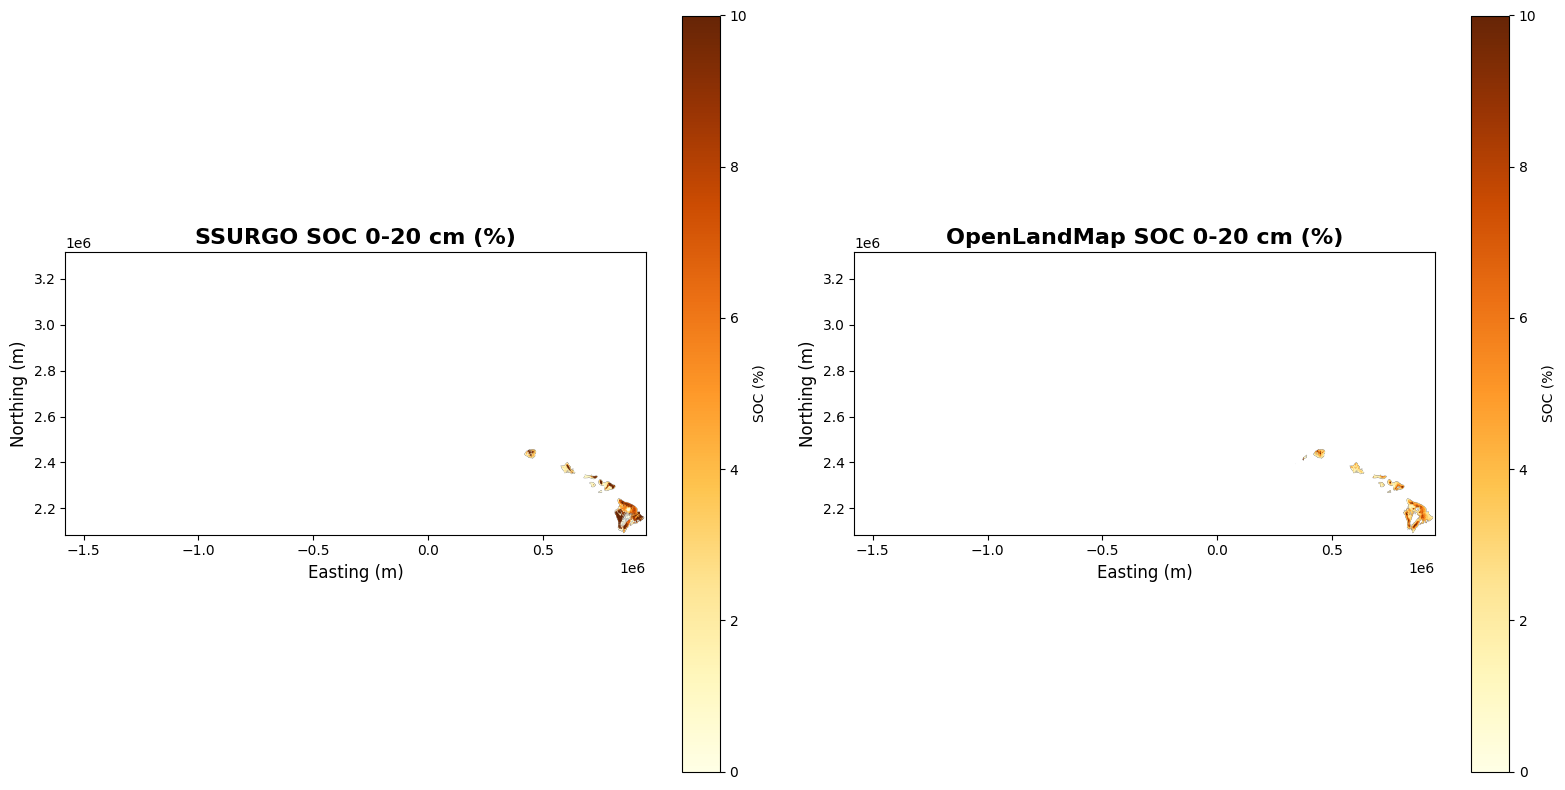

✓ Saved difference map


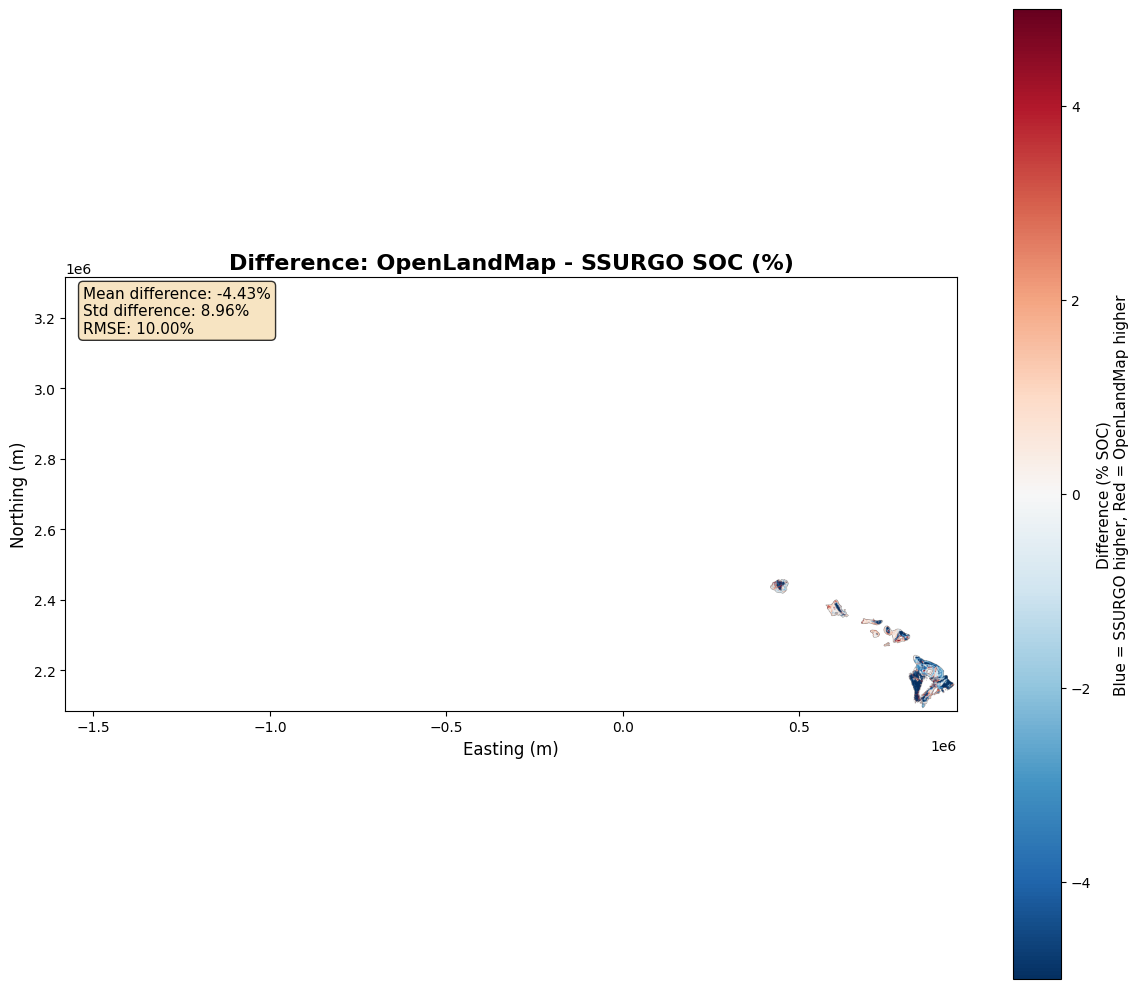

✓ Saved pixel-wise comparison


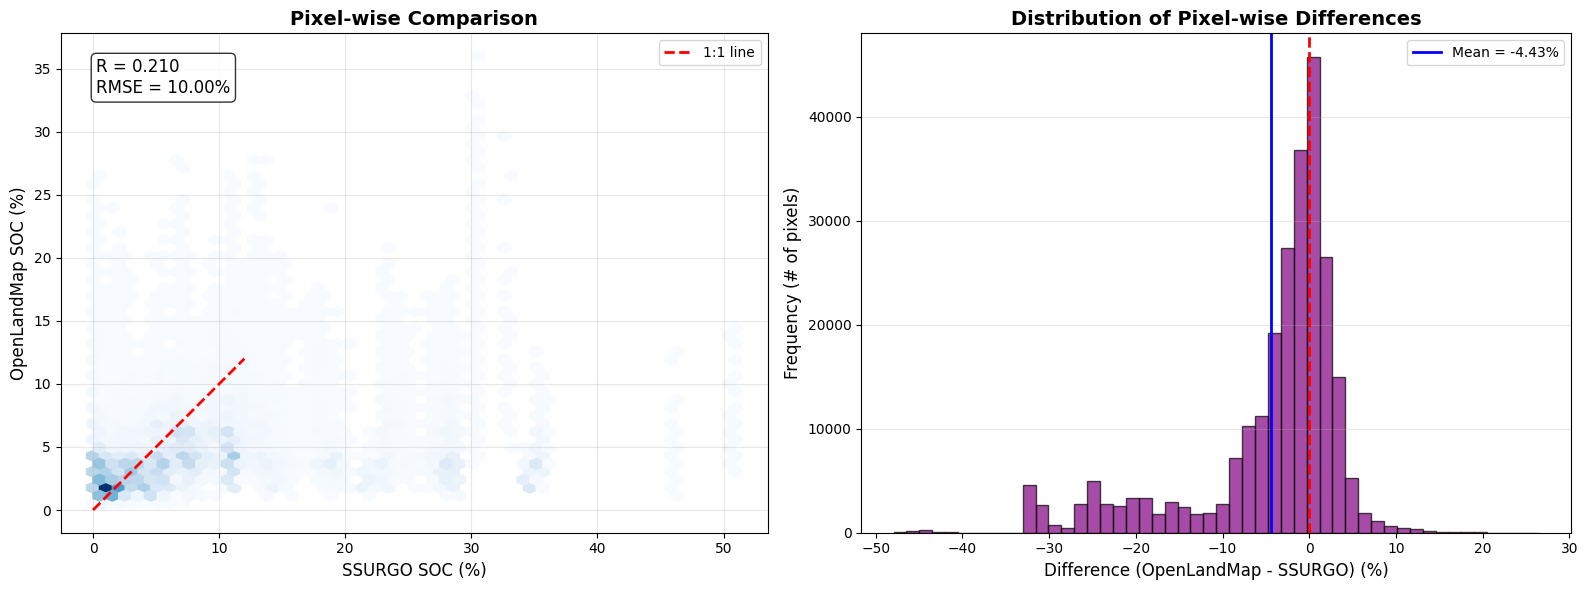


SPATIAL COMPARISON SUMMARY
Pixels compared: 251,812
Mean SSURGO: 7.76%
Mean OpenLandMap: 4.01%
Mean difference: -4.43%
RMSE: 10.00%
Correlation (R): 0.210


In [15]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm

# Read all three datasets (already in UTM)
with rasterio.open('/content/SOC_Hawaii_OpenLandMap_0-20cm_UTM.tif') as src:
    olm_data = src.read(1) / 2.0  # Convert to %
    olm_data[olm_data == 0] = np.nan
    transform = src.transform
    bounds = src.bounds
    crs = src.crs

# Rasterize SSURGO to match OLM grid
from rasterio.features import rasterize
ssurgo_utm = gpd.read_file('/content/SSURGO_HI_SOC_0-20cm.gpkg')
ssurgo_utm = ssurgo_utm.to_crs(crs)

shapes = [(geom, value) for geom, value in
          zip(ssurgo_utm.geometry, ssurgo_utm['soc_0_20cm_pct'])
          if value is not None and not np.isnan(value)]

ssurgo_raster = rasterize(
    shapes,
    out_shape=olm_data.shape,
    transform=transform,
    fill=np.nan,
    dtype='float32'
)

# ============================================================
# 1. SIDE-BY-SIDE MAPS
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# SSURGO
im1 = axes[0].imshow(ssurgo_raster, cmap='YlOrBr', vmin=0, vmax=10,
                     extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
axes[0].set_title('SSURGO SOC 0-20 cm (%)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Easting (m)', fontsize=12)
axes[0].set_ylabel('Northing (m)', fontsize=12)
plt.colorbar(im1, ax=axes[0], label='SOC (%)')

# OpenLandMap
im2 = axes[1].imshow(olm_data, cmap='YlOrBr', vmin=0, vmax=10,
                     extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
axes[1].set_title('OpenLandMap SOC 0-20 cm (%)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Easting (m)', fontsize=12)
axes[1].set_ylabel('Northing (m)', fontsize=12)
plt.colorbar(im2, ax=axes[1], label='SOC (%)')

plt.tight_layout()
plt.savefig('/content/soc_spatial_comparison_maps.png', dpi=300, bbox_inches='tight')
print("✓ Saved side-by-side maps")
plt.show()

# ============================================================
# 2. DIFFERENCE MAP (OpenLandMap - SSURGO)
# ============================================================
difference = olm_data - ssurgo_raster

fig, ax = plt.subplots(figsize=(12, 10))

# Use diverging colormap centered at 0
norm = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)
im = ax.imshow(difference, cmap='RdBu_r', norm=norm,
               extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])

ax.set_title('Difference: OpenLandMap - SSURGO SOC (%)', fontsize=16, fontweight='bold')
ax.set_xlabel('Easting (m)', fontsize=12)
ax.set_ylabel('Northing (m)', fontsize=12)

cbar = plt.colorbar(im, ax=ax, label='Difference in SOC (%)')
cbar.set_label('Difference (% SOC)\nBlue = SSURGO higher, Red = OpenLandMap higher', fontsize=11)

# Add statistics text box
mask = ~(np.isnan(difference))
stats_text = f'Mean difference: {np.nanmean(difference):.2f}%\n'
stats_text += f'Std difference: {np.nanstd(difference):.2f}%\n'
stats_text += f'RMSE: {np.sqrt(np.nanmean(difference**2)):.2f}%'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('/content/soc_difference_map.png', dpi=300, bbox_inches='tight')
print("✓ Saved difference map")
plt.show()

# ============================================================
# 3. PIXEL-WISE CORRELATION/AGREEMENT
# ============================================================
# Flatten arrays and remove NaNs
mask = ~(np.isnan(olm_data) | np.isnan(ssurgo_raster))
olm_flat = olm_data[mask]
ssurgo_flat = ssurgo_raster[mask]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].hexbin(ssurgo_flat, olm_flat, gridsize=50, cmap='Blues', mincnt=1)
axes[0].plot([0, 12], [0, 12], 'r--', linewidth=2, label='1:1 line')
axes[0].set_xlabel('SSURGO SOC (%)', fontsize=12)
axes[0].set_ylabel('OpenLandMap SOC (%)', fontsize=12)
axes[0].set_title('Pixel-wise Comparison', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# Calculate correlation
r = np.corrcoef(ssurgo_flat, olm_flat)[0, 1]
rmse = np.sqrt(np.mean((ssurgo_flat - olm_flat)**2))
axes[0].text(0.05, 0.95, f'R = {r:.3f}\nRMSE = {rmse:.2f}%',
             transform=axes[0].transAxes, fontsize=12,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Difference histogram
axes[1].hist(olm_flat - ssurgo_flat, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].axvline(np.mean(olm_flat - ssurgo_flat), color='blue', linestyle='-', linewidth=2,
                label=f'Mean = {np.mean(olm_flat - ssurgo_flat):.2f}%')
axes[1].set_xlabel('Difference (OpenLandMap - SSURGO) (%)', fontsize=12)
axes[1].set_ylabel('Frequency (# of pixels)', fontsize=12)
axes[1].set_title('Distribution of Pixel-wise Differences', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/soc_pixel_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved pixel-wise comparison")
plt.show()

# ============================================================
# 4. SUMMARY STATISTICS BY REGION (optional - if you have regions)
# ============================================================
print("\n" + "="*60)
print("SPATIAL COMPARISON SUMMARY")
print("="*60)
print(f"Pixels compared: {np.sum(mask):,}")
print(f"Mean SSURGO: {np.nanmean(ssurgo_raster):.2f}%")
print(f"Mean OpenLandMap: {np.nanmean(olm_data):.2f}%")
print(f"Mean difference: {np.nanmean(difference):.2f}%")
print(f"RMSE: {np.sqrt(np.nanmean(difference**2)):.2f}%")
print(f"Correlation (R): {r:.3f}")

Calculated soc_mean for 284627 points
Your study area contains 297 polygons
Clipped raster dimensions: (89, 109)
Valid pixels - Transformer: 4841, SSURGO: 4840, OpenLandMap: 4840

✓ Saved three-panel comparison


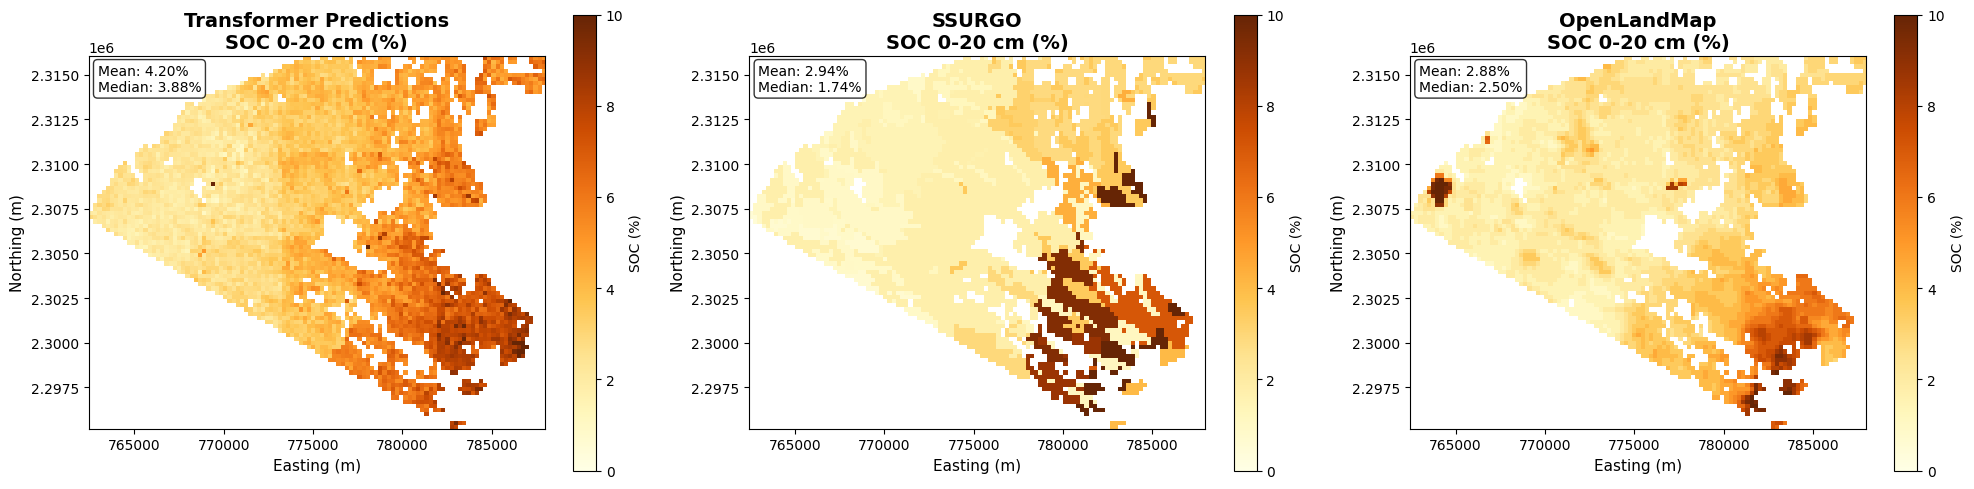

✓ Saved difference maps


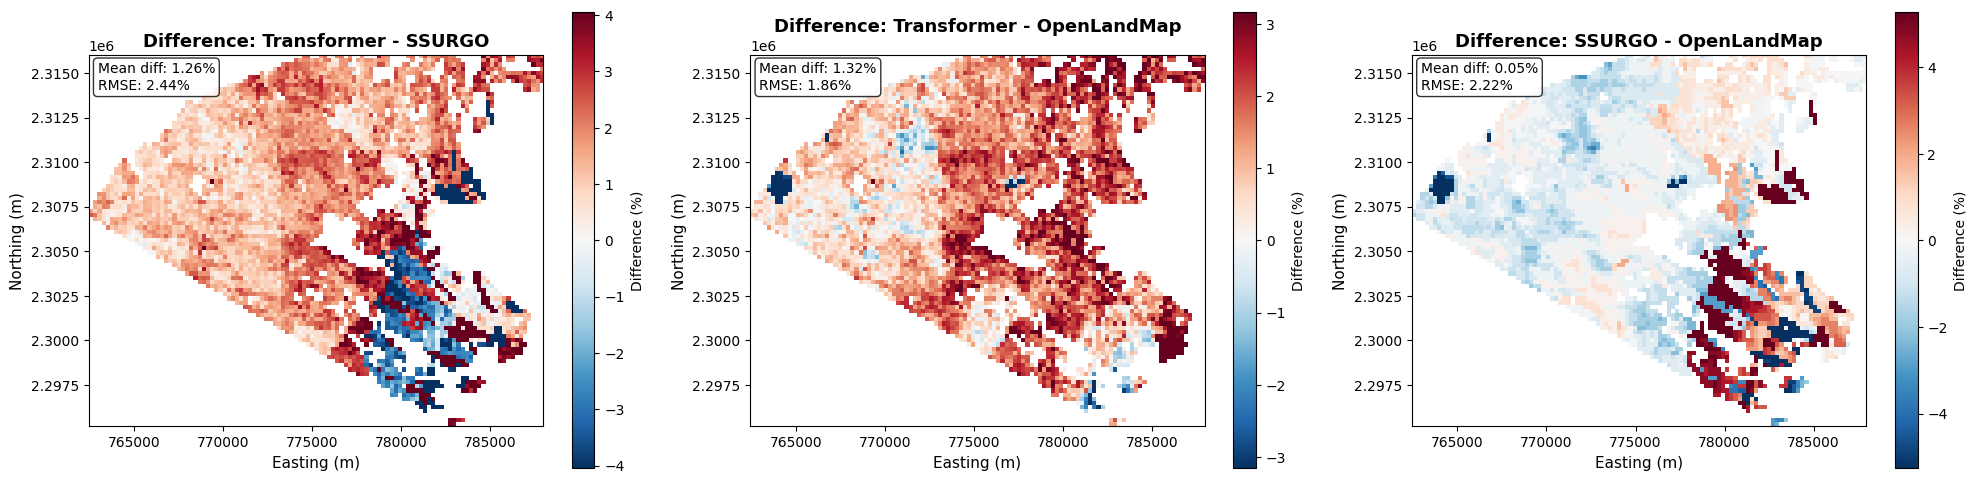

✓ Saved pixel scatter plots


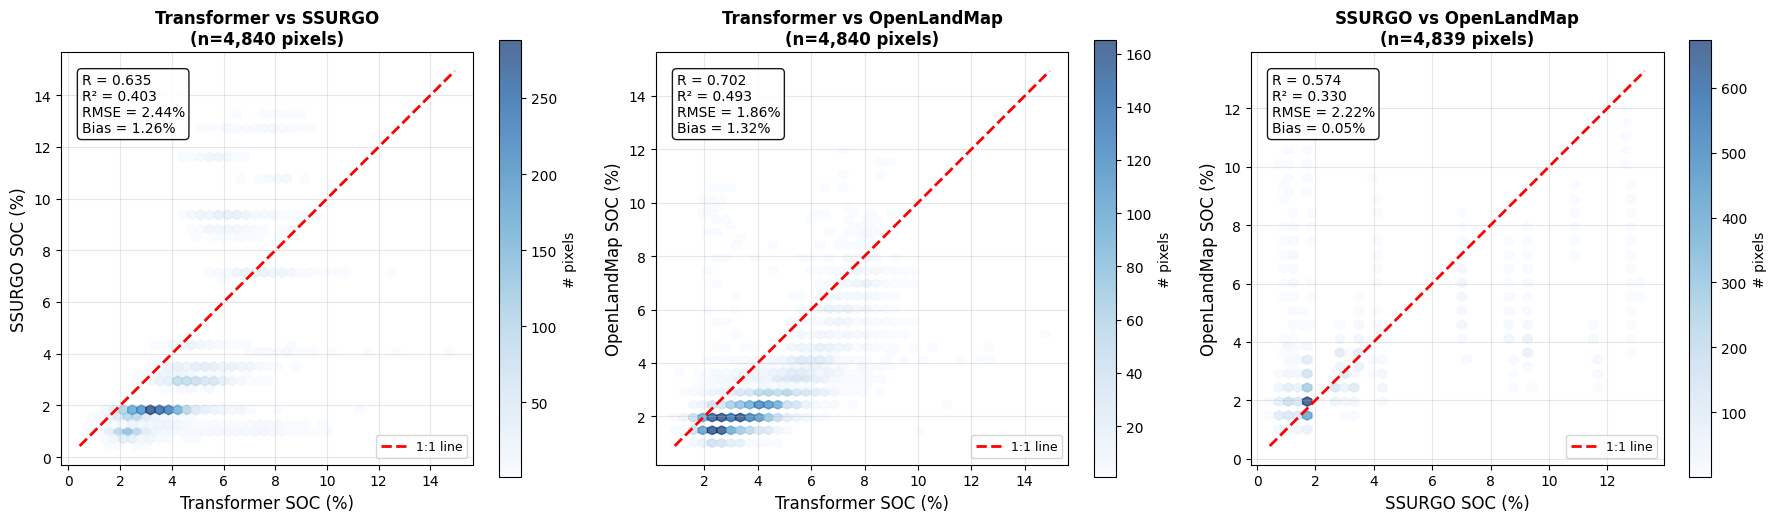


MAUI STUDY AREA - SPATIAL COMPARISON SUMMARY

Mean SOC (%) by dataset:
  Transformer Predictions: 4.20
  SSURGO:                  2.94
  OpenLandMap:             2.88

Pixel-wise comparison metrics:

Transformer vs SSURGO:
  N pixels: 4,840
  R: 0.635, R²: 0.403
  RMSE: 2.44%
  Bias: 1.26%
  MAE: 1.99%

Transformer vs OpenLandMap:
  N pixels: 4,840
  R: 0.702, R²: 0.493
  RMSE: 1.86%
  Bias: 1.32%
  MAE: 1.52%

SSURGO vs OpenLandMap:
  N pixels: 4,839
  R: 0.574, R²: 0.330
  RMSE: 2.22%
  Bias: 0.05%
  MAE: 1.34%

SPATIAL ANALYSIS COMPLETE!


In [17]:
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm
import geopandas as gpd
from scipy import stats

# ============================================================
# 1. READ YOUR MAUI POLYGONS AND CALCULATE SOC_MEAN
# ============================================================
carbon_preds = gpd.read_file('/content/maui_carbon_analysis_polyids_4326.gpkg')
carbon_preds_utm = carbon_preds.to_crs('EPSG:32604')

# Calculate mean SOC across all dates (excluding d_20161217)
date_columns = [col for col in carbon_preds_utm.columns if col.startswith('d_') and col != 'd_20161217']
carbon_preds_utm['soc_mean'] = carbon_preds_utm[date_columns].mean(axis=1)

print(f"Calculated soc_mean for {len(carbon_preds_utm)} points")
print(f"Your study area contains {carbon_preds_utm['polygonid'].nunique()} polygons")

# Get the boundary of all your polygons
maui_boundary = carbon_preds_utm.dissolve()

# ============================================================
# 2. CLIP ALL RASTERS TO YOUR STUDY AREA
# ============================================================
# Clip OpenLandMap
with rasterio.open('/content/SOC_Hawaii_OpenLandMap_0-20cm_UTM.tif') as src:
    olm_clipped, olm_transform = mask(src, maui_boundary.geometry, crop=True)
    olm_clipped = olm_clipped[0] / 2.0  # Convert to %
    olm_clipped[olm_clipped == 0] = np.nan
    olm_profile = src.profile.copy()
    olm_profile.update({
        'height': olm_clipped.shape[0],
        'width': olm_clipped.shape[1],
        'transform': olm_transform
    })

# Get bounds for plotting
bounds = rasterio.transform.array_bounds(
    olm_profile['height'],
    olm_profile['width'],
    olm_transform
)

print(f"Clipped raster dimensions: {olm_clipped.shape}")

# Rasterize SSURGO to match clipped grid
ssurgo_utm = gpd.read_file('/content/SSURGO_HI_SOC_0-20cm.gpkg')
ssurgo_utm = ssurgo_utm.to_crs('EPSG:32604')

# Clip SSURGO to study area
ssurgo_clipped = gpd.clip(ssurgo_utm, maui_boundary)

from rasterio.features import rasterize
shapes = [(geom, value) for geom, value in
          zip(ssurgo_clipped.geometry, ssurgo_clipped['soc_0_20cm_pct'])
          if value is not None and not np.isnan(value)]

ssurgo_raster = rasterize(
    shapes,
    out_shape=olm_clipped.shape,
    transform=olm_transform,
    fill=np.nan,
    dtype='float32'
)

# Rasterize your transformer predictions
shapes_preds = [(geom, value) for geom, value in
                zip(carbon_preds_utm.geometry, carbon_preds_utm['soc_mean'])
                if value is not None and not np.isnan(value)]

transformer_raster = rasterize(
    shapes_preds,
    out_shape=olm_clipped.shape,
    transform=olm_transform,
    fill=np.nan,
    dtype='float32'
)

print(f"Valid pixels - Transformer: {np.sum(~np.isnan(transformer_raster))}, "
      f"SSURGO: {np.sum(~np.isnan(ssurgo_raster))}, "
      f"OpenLandMap: {np.sum(~np.isnan(olm_clipped))}")

# ============================================================
# 3. THREE-PANEL MAP COMPARISON
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

vmin, vmax = 0, 10  # Common scale

datasets = [
    (transformer_raster, 'Transformer Predictions', 0),
    (ssurgo_raster, 'SSURGO', 1),
    (olm_clipped, 'OpenLandMap', 2)
]

for data, title, idx in datasets:
    im = axes[idx].imshow(data, cmap='YlOrBr', vmin=vmin, vmax=vmax,
                          extent=[bounds[0], bounds[2], bounds[1], bounds[3]])
    axes[idx].set_title(f'{title}\nSOC 0-20 cm (%)', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Easting (m)', fontsize=11)
    axes[idx].set_ylabel('Northing (m)', fontsize=11)

    # Add mean/median text
    mean_val = np.nanmean(data)
    median_val = np.nanmedian(data)
    axes[idx].text(0.02, 0.98, f'Mean: {mean_val:.2f}%\nMedian: {median_val:.2f}%',
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.colorbar(im, ax=axes[idx], label='SOC (%)', shrink=0.8)

plt.tight_layout()
plt.savefig('/content/maui_soc_three_panel_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved three-panel comparison")
plt.show()

# ============================================================
# 4. DIFFERENCE MAPS
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

differences = [
    (transformer_raster - ssurgo_raster, 'Transformer - SSURGO', 0),
    (transformer_raster - olm_clipped, 'Transformer - OpenLandMap', 1),
    (ssurgo_raster - olm_clipped, 'SSURGO - OpenLandMap', 2)
]

for diff_data, title, idx in differences:
    # Use diverging colormap centered at 0
    vmax_diff = max(abs(np.nanpercentile(diff_data, 5)), abs(np.nanpercentile(diff_data, 95)))
    norm = TwoSlopeNorm(vmin=-vmax_diff, vcenter=0, vmax=vmax_diff)

    im = axes[idx].imshow(diff_data, cmap='RdBu_r', norm=norm,
                          extent=[bounds[0], bounds[2], bounds[1], bounds[3]])
    axes[idx].set_title(f'Difference: {title}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Easting (m)', fontsize=11)
    axes[idx].set_ylabel('Northing (m)', fontsize=11)

    # Statistics
    mean_diff = np.nanmean(diff_data)
    rmse = np.sqrt(np.nanmean(diff_data**2))

    axes[idx].text(0.02, 0.98,
                   f'Mean diff: {mean_diff:.2f}%\nRMSE: {rmse:.2f}%',
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    cbar = plt.colorbar(im, ax=axes[idx], shrink=0.8)
    cbar.set_label('Difference (%)', fontsize=10)

plt.tight_layout()
plt.savefig('/content/maui_soc_difference_maps.png', dpi=300, bbox_inches='tight')
print("✓ Saved difference maps")
plt.show()

# ============================================================
# 5. PIXEL-WISE SCATTER PLOTS
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    (transformer_raster, ssurgo_raster, 'Transformer', 'SSURGO', 0),
    (transformer_raster, olm_clipped, 'Transformer', 'OpenLandMap', 1),
    (ssurgo_raster, olm_clipped, 'SSURGO', 'OpenLandMap', 2)
]

for data1, data2, label1, label2, idx in comparisons:
    # Get valid data
    mask_valid = ~(np.isnan(data1) | np.isnan(data2))
    x = data1[mask_valid]
    y = data2[mask_valid]

    # Hexbin plot
    hb = axes[idx].hexbin(x, y, gridsize=40, cmap='Blues', mincnt=1, alpha=0.7)

    # 1:1 line
    max_val = max(x.max(), y.max())
    min_val = min(x.min(), y.min())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--',
                   linewidth=2, label='1:1 line')

    # Calculate metrics
    r, p = stats.pearsonr(x, y)
    rmse = np.sqrt(np.mean((x - y)**2))
    bias = np.mean(x - y)

    axes[idx].set_xlabel(f'{label1} SOC (%)', fontsize=12)
    axes[idx].set_ylabel(f'{label2} SOC (%)', fontsize=12)
    axes[idx].set_title(f'{label1} vs {label2}\n(n={len(x):,} pixels)',
                        fontsize=12, fontweight='bold')

    # Stats box
    stats_text = f'R = {r:.3f}\nR² = {r**2:.3f}\nRMSE = {rmse:.2f}%\nBias = {bias:.2f}%'
    axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_aspect('equal')

    plt.colorbar(hb, ax=axes[idx], label='# pixels')

plt.tight_layout()
plt.savefig('/content/maui_soc_pixel_scatter.png', dpi=300, bbox_inches='tight')
print("✓ Saved pixel scatter plots")
plt.show()

# ============================================================
# 6. SPATIAL STATISTICS SUMMARY
# ============================================================
print("\n" + "="*60)
print("MAUI STUDY AREA - SPATIAL COMPARISON SUMMARY")
print("="*60)

# Overall statistics
print("\nMean SOC (%) by dataset:")
print(f"  Transformer Predictions: {np.nanmean(transformer_raster):.2f}")
print(f"  SSURGO:                  {np.nanmean(ssurgo_raster):.2f}")
print(f"  OpenLandMap:             {np.nanmean(olm_clipped):.2f}")

print("\nPixel-wise comparison metrics:")
comparisons_stats = [
    (transformer_raster, ssurgo_raster, 'Transformer vs SSURGO'),
    (transformer_raster, olm_clipped, 'Transformer vs OpenLandMap'),
    (ssurgo_raster, olm_clipped, 'SSURGO vs OpenLandMap')
]

for data1, data2, label in comparisons_stats:
    mask_valid = ~(np.isnan(data1) | np.isnan(data2))
    x = data1[mask_valid]
    y = data2[mask_valid]

    if len(x) > 0:
        r, p = stats.pearsonr(x, y)
        rmse = np.sqrt(np.mean((x - y)**2))
        bias = np.mean(x - y)
        mae = np.mean(np.abs(x - y))

        print(f"\n{label}:")
        print(f"  N pixels: {len(x):,}")
        print(f"  R: {r:.3f}, R²: {r**2:.3f}")
        print(f"  RMSE: {rmse:.2f}%")
        print(f"  Bias: {bias:.2f}%")
        print(f"  MAE: {mae:.2f}%")

print("\n" + "="*60)
print("SPATIAL ANALYSIS COMPLETE!")
print("="*60)

✓ Saved pixel scatter plots


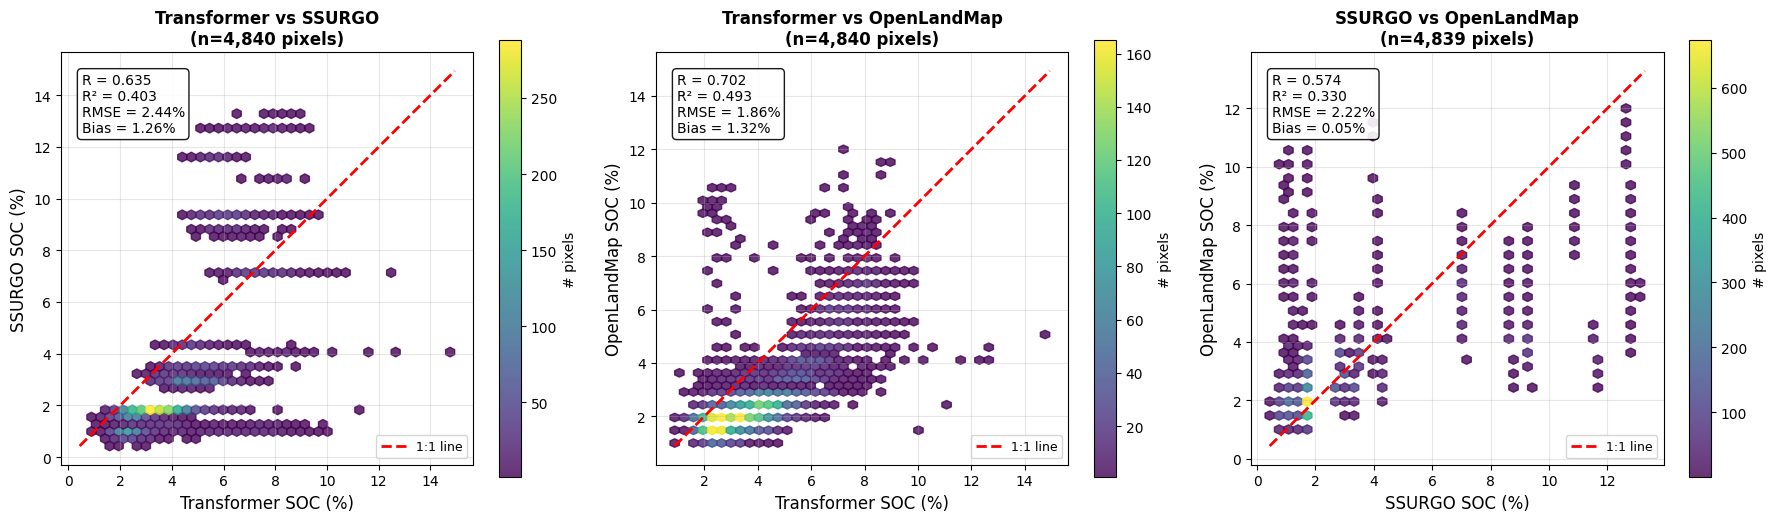

In [18]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# PIXEL-WISE SCATTER PLOTS (with visible colors)
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    (transformer_raster, ssurgo_raster, 'Transformer', 'SSURGO', 0),
    (transformer_raster, olm_clipped, 'Transformer', 'OpenLandMap', 1),
    (ssurgo_raster, olm_clipped, 'SSURGO', 'OpenLandMap', 2)
]

for data1, data2, label1, label2, idx in comparisons:
    # Get valid data
    mask_valid = ~(np.isnan(data1) | np.isnan(data2))
    x = data1[mask_valid]
    y = data2[mask_valid]

    # Hexbin plot with better colormap (no white)
    hb = axes[idx].hexbin(x, y, gridsize=40, cmap='viridis', mincnt=1, alpha=0.8)

    # 1:1 line
    max_val = max(x.max(), y.max())
    min_val = min(x.min(), y.min())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--',
                   linewidth=2, label='1:1 line')

    # Calculate metrics
    r, p = stats.pearsonr(x, y)
    rmse = np.sqrt(np.mean((x - y)**2))
    bias = np.mean(x - y)

    axes[idx].set_xlabel(f'{label1} SOC (%)', fontsize=12)
    axes[idx].set_ylabel(f'{label2} SOC (%)', fontsize=12)
    axes[idx].set_title(f'{label1} vs {label2}\n(n={len(x):,} pixels)',
                        fontsize=12, fontweight='bold')

    # Stats box
    stats_text = f'R = {r:.3f}\nR² = {r**2:.3f}\nRMSE = {rmse:.2f}%\nBias = {bias:.2f}%'
    axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_aspect('equal')

    plt.colorbar(hb, ax=axes[idx], label='# pixels')

plt.tight_layout()
plt.savefig('/content/maui_soc_pixel_scatter.png', dpi=300, bbox_inches='tight')
print("✓ Saved pixel scatter plots")
plt.show()

Polygon comparison data:
   polygonid  soc_mean  ssurgo_soc   olm_soc
0        945  4.522869    2.864819  2.352500
1        960  4.599675    3.078708  2.500000
2        979  4.968738    2.889523  2.712042
3        980  4.682870    2.619367  2.900000
4        987  4.687403    2.875293  2.242958


/tmp/ipython-input-3670967242.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polygon_geoms = carbon_preds_utm.groupby('polygonid').apply(



Created 297 polygon geometries

Final dataset has 297 polygons
Polygons with all three datasets: 297

✓ Saved three-panel polygon comparison


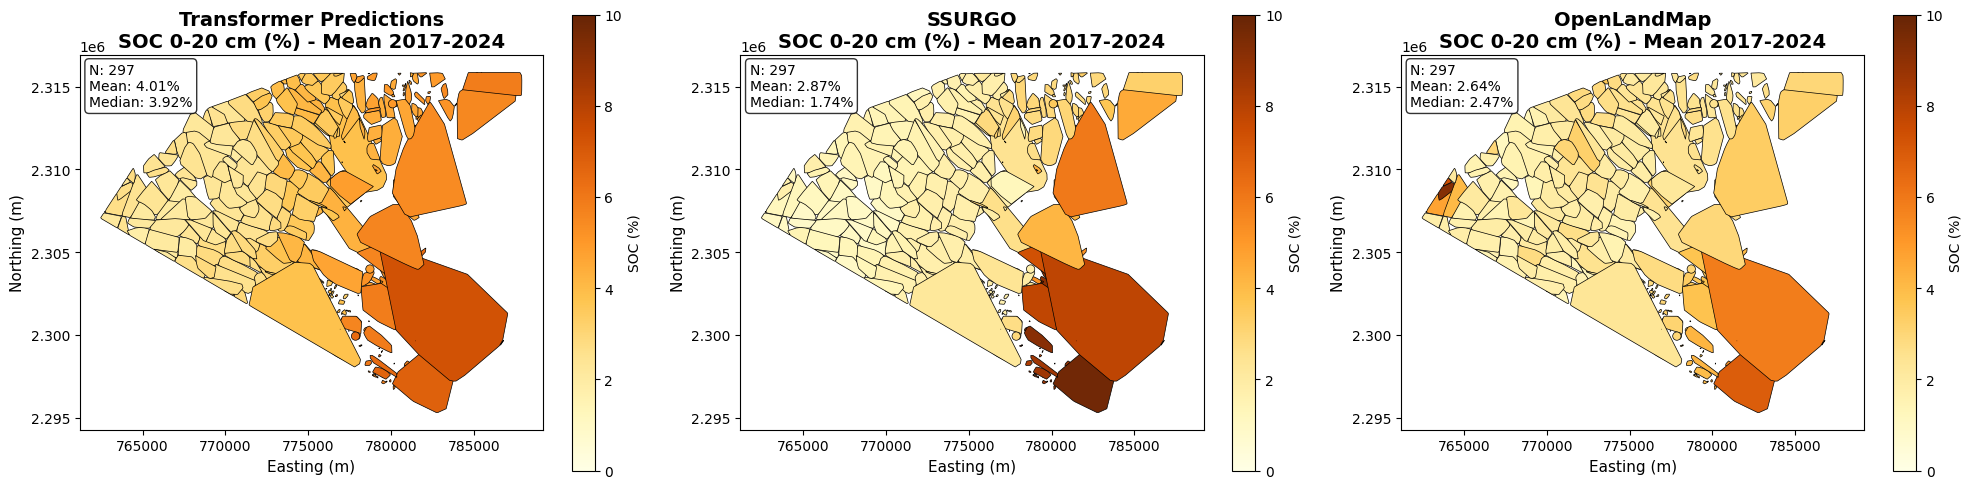

✓ Saved difference maps (polygon level)


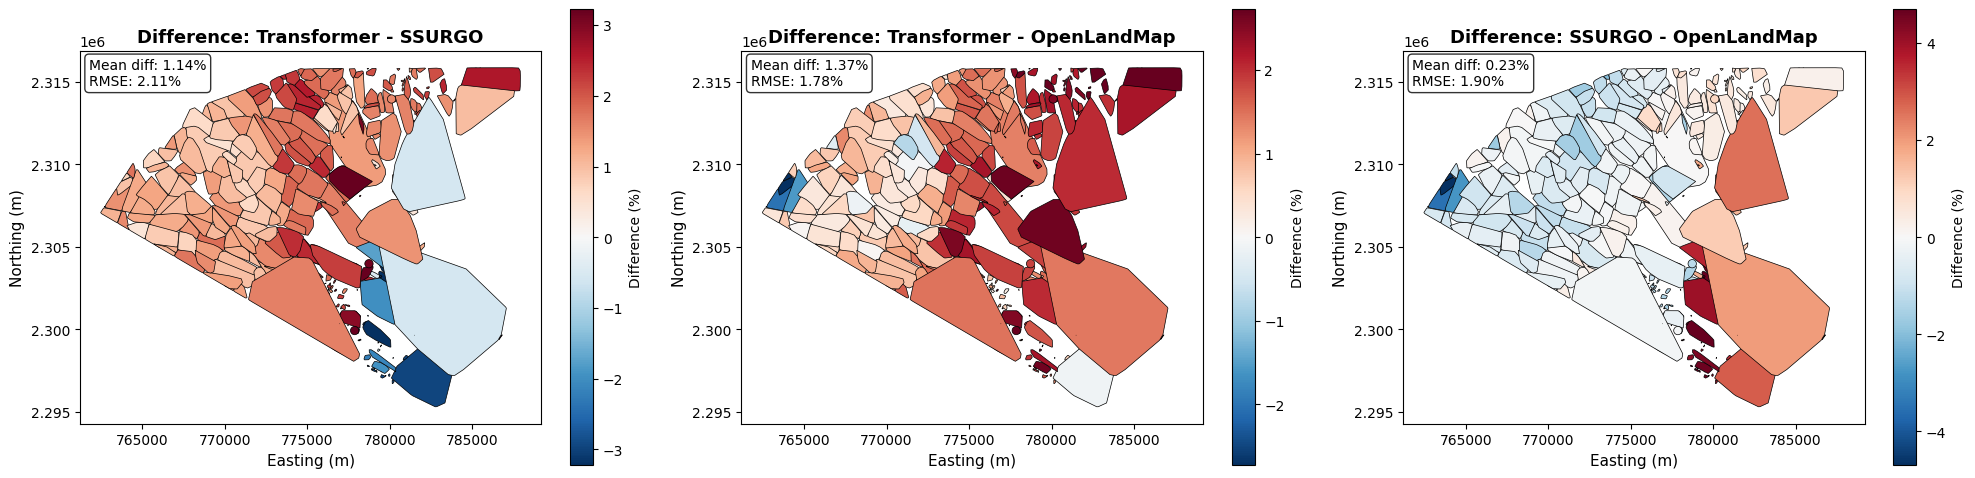

✓ Saved polygon scatter plots


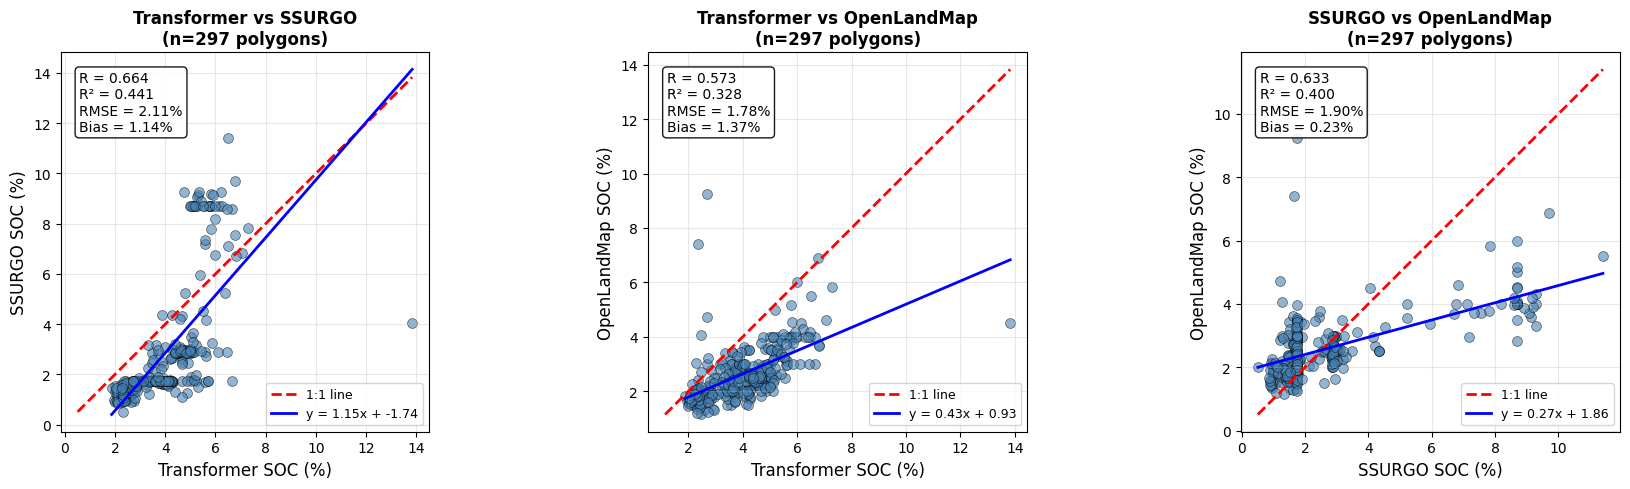


MAUI STUDY AREA - POLYGON-LEVEL SPATIAL COMPARISON

Number of management polygons: 297

Mean SOC (%) by dataset:
  Transformer Predictions: 4.01
  SSURGO:                  2.87
  OpenLandMap:             2.64

Polygon-wise comparison metrics:

Transformer vs SSURGO:
  N polygons: 297
  R: 0.664, R²: 0.441
  RMSE: 2.11%
  Bias: 1.14%
  MAE: 1.86%

Transformer vs OpenLandMap:
  N polygons: 297
  R: 0.573, R²: 0.328
  RMSE: 1.78%
  Bias: 1.37%
  MAE: 1.49%

SSURGO vs OpenLandMap:
  N polygons: 297
  R: 0.633, R²: 0.400
  RMSE: 1.90%
  Bias: 0.23%
  MAE: 1.22%

✓ Saved spatial polygon comparison to: maui_polygon_spatial_comparison.gpkg

POLYGON-LEVEL SPATIAL ANALYSIS COMPLETE!

Generated files:
  • maui_polygon_soc_three_panel_comparison.png
  • maui_polygon_soc_difference_maps.png
  • maui_polygon_soc_scatter.png
  • maui_polygon_spatial_comparison.gpkg


In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm
from shapely.geometry import MultiPoint
from scipy import stats
import pandas as pd

# ============================================================
# 1. BUILD CLEAN POLYGON GEOMETRIES FROM POINTS
# ============================================================
# Read the polygon-level comparison (has the correct mean SOC per polygon)
polygon_comparison = pd.read_csv('/content/polygon_level_comparison.csv')

print("Polygon comparison data:")
print(polygon_comparison[['polygonid', 'soc_mean', 'ssurgo_soc', 'olm_soc']].head())

# Read original data ONLY to get point geometries
carbon_preds = gpd.read_file('/content/maui_carbon_analysis_polyids_4326.gpkg')
carbon_preds_utm = carbon_preds.to_crs('EPSG:32604')

# Keep ONLY polygonid and geometry - drop everything else
carbon_preds_utm = carbon_preds_utm[['polygonid', 'geometry']]

# Create polygon geometries from point clusters
def points_to_polygon(group):
    # Get all points for this polygon
    points = [geom for geom in group.geometry]
    # Create convex hull around points
    multipoint = MultiPoint(points)
    return multipoint.convex_hull

# Group by polygonid and create polygon geometries
polygon_geoms = carbon_preds_utm.groupby('polygonid').apply(
    lambda x: points_to_polygon(x)
).reset_index()
polygon_geoms.columns = ['polygonid', 'geometry']

# Convert to GeoDataFrame
polygon_geoms = gpd.GeoDataFrame(polygon_geoms, geometry='geometry', crs='EPSG:32604')

print(f"\nCreated {len(polygon_geoms)} polygon geometries")

# Now merge ONLY the SOC values from polygon_comparison
polygons_spatial = polygon_geoms.merge(
    polygon_comparison[['polygonid', 'soc_mean', 'ssurgo_soc', 'olm_soc']],
    on='polygonid',
    how='left'
)

print(f"\nFinal dataset has {len(polygons_spatial)} polygons")
print(f"Polygons with all three datasets: {polygons_spatial[['soc_mean', 'ssurgo_soc', 'olm_soc']].notna().all(axis=1).sum()}")

# ============================================================
# 2. THREE-PANEL CHOROPLETH MAPS
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

vmin, vmax = 0, 10  # Common scale

datasets = [
    ('soc_mean', 'Transformer Predictions', 0),
    ('ssurgo_soc', 'SSURGO', 1),
    ('olm_soc', 'OpenLandMap', 2)
]

for col, title, idx in datasets:
    polygons_spatial.plot(column=col, ax=axes[idx], cmap='YlOrBr',
                         vmin=vmin, vmax=vmax, edgecolor='black', linewidth=0.5,
                         legend=True, legend_kwds={'label': 'SOC (%)', 'shrink': 0.8},
                         missing_kwds={'color': 'lightgrey', 'edgecolor': 'black', 'linewidth': 0.5})

    axes[idx].set_title(f'{title}\nSOC 0-20 cm (%) - Mean 2017-2024', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Easting (m)', fontsize=11)
    axes[idx].set_ylabel('Northing (m)', fontsize=11)

    # Add mean/median text
    mean_val = polygons_spatial[col].mean()
    median_val = polygons_spatial[col].median()
    n_valid = polygons_spatial[col].notna().sum()
    axes[idx].text(0.02, 0.98, f'N: {n_valid}\nMean: {mean_val:.2f}%\nMedian: {median_val:.2f}%',
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[idx].set_aspect('equal')

plt.tight_layout()
plt.savefig('/content/maui_polygon_soc_three_panel_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved three-panel polygon comparison")
plt.show()

# ============================================================
# 3. DIFFERENCE MAPS (POLYGON LEVEL)
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Calculate differences
polygons_spatial['diff_trans_ssurgo'] = polygons_spatial['soc_mean'] - polygons_spatial['ssurgo_soc']
polygons_spatial['diff_trans_olm'] = polygons_spatial['soc_mean'] - polygons_spatial['olm_soc']
polygons_spatial['diff_ssurgo_olm'] = polygons_spatial['ssurgo_soc'] - polygons_spatial['olm_soc']

differences = [
    ('diff_trans_ssurgo', 'Transformer - SSURGO', 0),
    ('diff_trans_olm', 'Transformer - OpenLandMap', 1),
    ('diff_ssurgo_olm', 'SSURGO - OpenLandMap', 2)
]

for col, title, idx in differences:
    # Get symmetric color scale
    vmax_diff = max(abs(polygons_spatial[col].quantile(0.05)),
                    abs(polygons_spatial[col].quantile(0.95)))

    polygons_spatial.plot(column=col, ax=axes[idx], cmap='RdBu_r',
                         vmin=-vmax_diff, vmax=vmax_diff,
                         edgecolor='black', linewidth=0.5,
                         legend=True, legend_kwds={'label': 'Difference (%)', 'shrink': 0.8},
                         missing_kwds={'color': 'lightgrey', 'edgecolor': 'black', 'linewidth': 0.5})

    axes[idx].set_title(f'Difference: {title}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Easting (m)', fontsize=11)
    axes[idx].set_ylabel('Northing (m)', fontsize=11)

    # Statistics
    mean_diff = polygons_spatial[col].mean()
    rmse = np.sqrt((polygons_spatial[col]**2).mean())

    axes[idx].text(0.02, 0.98,
                   f'Mean diff: {mean_diff:.2f}%\nRMSE: {rmse:.2f}%',
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[idx].set_aspect('equal')

plt.tight_layout()
plt.savefig('/content/maui_polygon_soc_difference_maps.png', dpi=300, bbox_inches='tight')
print("✓ Saved difference maps (polygon level)")
plt.show()

# ============================================================
# 4. POLYGON-WISE SCATTER PLOTS
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    ('soc_mean', 'ssurgo_soc', 'Transformer', 'SSURGO', 0),
    ('soc_mean', 'olm_soc', 'Transformer', 'OpenLandMap', 1),
    ('ssurgo_soc', 'olm_soc', 'SSURGO', 'OpenLandMap', 2)
]

for col1, col2, label1, label2, idx in comparisons:
    # Get valid data
    valid = polygons_spatial[[col1, col2]].dropna()
    x = valid[col1]
    y = valid[col2]

    # Scatter plot (not hexbin since we have fewer polygons)
    axes[idx].scatter(x, y, alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)

    # 1:1 line
    max_val = max(x.max(), y.max())
    min_val = min(x.min(), y.min())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--',
                   linewidth=2, label='1:1 line')

    # Regression line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    x_line = np.linspace(x.min(), x.max(), 100)
    axes[idx].plot(x_line, p(x_line), 'b-', linewidth=2,
                   label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

    # Calculate metrics
    r, p_val = stats.pearsonr(x, y)
    rmse = np.sqrt(np.mean((x - y)**2))
    bias = np.mean(x - y)

    axes[idx].set_xlabel(f'{label1} SOC (%)', fontsize=12)
    axes[idx].set_ylabel(f'{label2} SOC (%)', fontsize=12)
    axes[idx].set_title(f'{label1} vs {label2}\n(n={len(x)} polygons)',
                        fontsize=12, fontweight='bold')

    # Stats box
    stats_text = f'R = {r:.3f}\nR² = {r**2:.3f}\nRMSE = {rmse:.2f}%\nBias = {bias:.2f}%'
    axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_aspect('equal')

plt.tight_layout()
plt.savefig('/content/maui_polygon_soc_scatter.png', dpi=300, bbox_inches='tight')
print("✓ Saved polygon scatter plots")
plt.show()

# ============================================================
# 5. SPATIAL STATISTICS SUMMARY (POLYGON LEVEL)
# ============================================================
print("\n" + "="*60)
print("MAUI STUDY AREA - POLYGON-LEVEL SPATIAL COMPARISON")
print("="*60)

# Overall statistics
print(f"\nNumber of management polygons: {len(polygons_spatial)}")
print("\nMean SOC (%) by dataset:")
print(f"  Transformer Predictions: {polygons_spatial['soc_mean'].mean():.2f}")
print(f"  SSURGO:                  {polygons_spatial['ssurgo_soc'].mean():.2f}")
print(f"  OpenLandMap:             {polygons_spatial['olm_soc'].mean():.2f}")

print("\nPolygon-wise comparison metrics:")
comparisons_stats = [
    ('soc_mean', 'ssurgo_soc', 'Transformer vs SSURGO'),
    ('soc_mean', 'olm_soc', 'Transformer vs OpenLandMap'),
    ('ssurgo_soc', 'olm_soc', 'SSURGO vs OpenLandMap')
]

for col1, col2, label in comparisons_stats:
    valid = polygons_spatial[[col1, col2]].dropna()
    x = valid[col1].values
    y = valid[col2].values

    if len(x) > 0:
        r, p = stats.pearsonr(x, y)
        rmse = np.sqrt(np.mean((x - y)**2))
        bias = np.mean(x - y)
        mae = np.mean(np.abs(x - y))

        print(f"\n{label}:")
        print(f"  N polygons: {len(x)}")
        print(f"  R: {r:.3f}, R²: {r**2:.3f}")
        print(f"  RMSE: {rmse:.2f}%")
        print(f"  Bias: {bias:.2f}%")
        print(f"  MAE: {mae:.2f}%")

# Save the spatial polygon comparison
polygons_spatial.to_file('/content/maui_polygon_spatial_comparison.gpkg', driver='GPKG')
print(f"\n✓ Saved spatial polygon comparison to: maui_polygon_spatial_comparison.gpkg")

print("\n" + "="*60)
print("POLYGON-LEVEL SPATIAL ANALYSIS COMPLETE!")
print("="*60)
print("\nGenerated files:")
print("  • maui_polygon_soc_three_panel_comparison.png")
print("  • maui_polygon_soc_difference_maps.png")
print("  • maui_polygon_soc_scatter.png")
print("  • maui_polygon_spatial_comparison.gpkg")

Years in data: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Calculated yearly means for 284627 points

Aggregated to 297 polygons
Columns: ['polygonid', 'soc_2017_mean', 'soc_2018_mean', 'soc_2019_mean', 'soc_2020_mean', 'soc_2021_mean', 'soc_2022_mean', 'soc_2023_mean', 'soc_2024_mean', 'soc_2017_sd', 'soc_2018_sd', 'soc_2019_sd', 'soc_2020_sd', 'soc_2021_sd', 'soc_2022_sd', 'soc_2023_sd', 'soc_2024_sd']

✓ Saved to: polygon_yearly_comparison.csv

✓ Saved temporal comparison plot


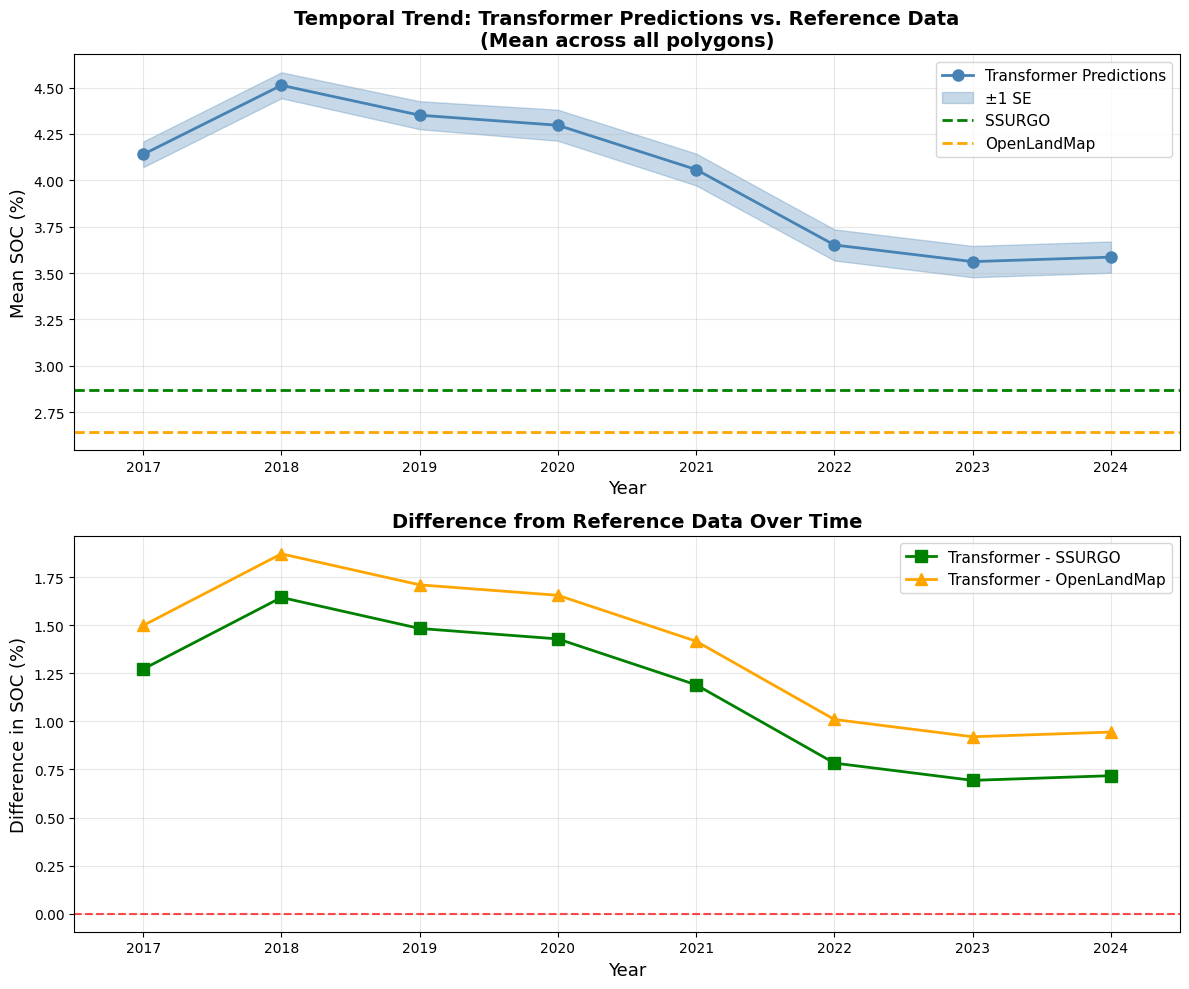

✓ Saved yearly correlation plots


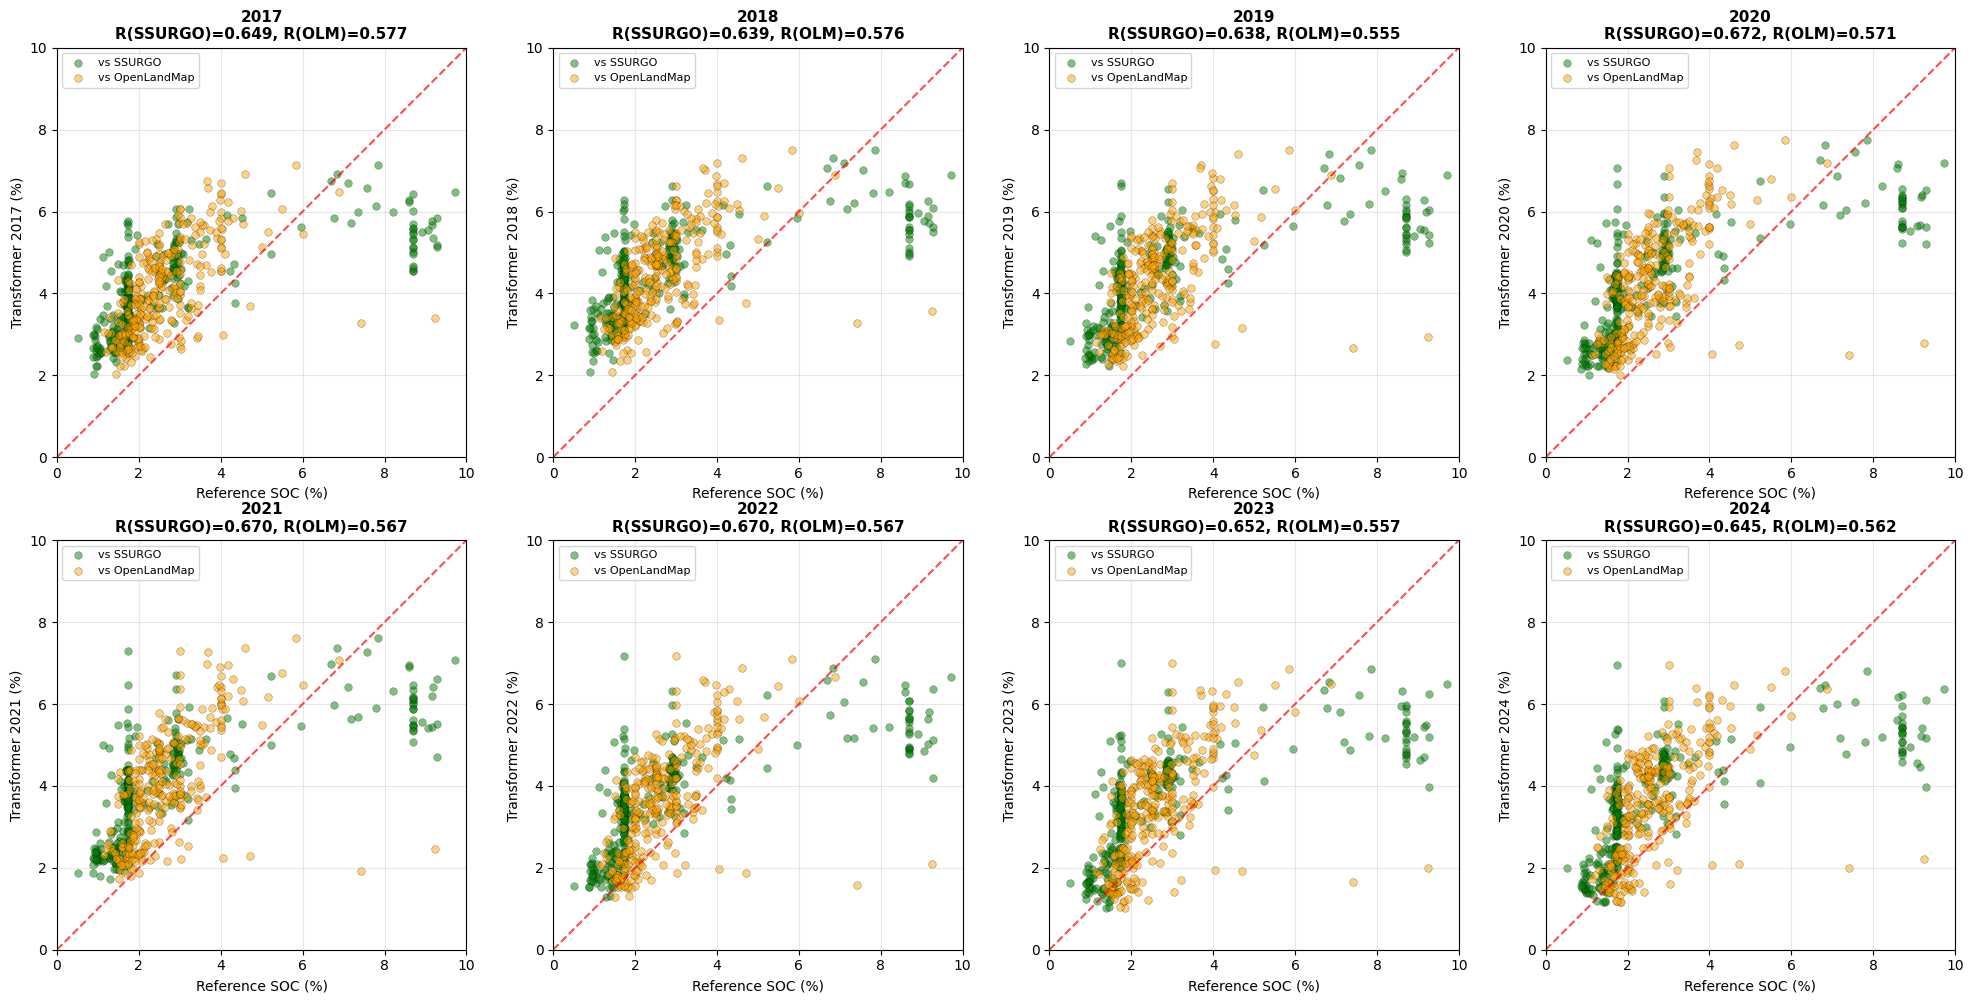


YEARLY COMPARISON SUMMARY
 Year  Transformer Mean  Transformer SD  R vs SSURGO  Bias vs SSURGO  RMSE vs SSURGO  R vs OpenLandMap  Bias vs OpenLandMap  RMSE vs OpenLandMap
 2017             4.140           1.189        0.649           1.271           2.225             0.577                1.498                1.814
 2018             4.512           1.205        0.639           1.644           2.467             0.576                1.870                2.137
 2019             4.351           1.299        0.638           1.483           2.353             0.555                1.709                2.043
 2020             4.297           1.441        0.672           1.428           2.261             0.571                1.655                2.043
 2021             4.058           1.481        0.670           1.190           2.120             0.567                1.416                1.876
 2022             3.651           1.446        0.670           0.783           1.923             0.567 

In [24]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ============================================================
# 1. CALCULATE YEARLY MEANS AT POLYGON LEVEL
# ============================================================
# Read the point-level data with all timeseries
carbon_preds = gpd.read_file('/content/maui_carbon_analysis_polyids_4326.gpkg')

# Get all date columns (excluding d_20161217)
date_columns = [col for col in carbon_preds.columns if col.startswith('d_') and col != 'd_20161217']

# Extract year from date column names (e.g., 'd_20170116' -> 2017)
def extract_year(col_name):
    return int(col_name.split('_')[1][:4])

# Group date columns by year
years = sorted(set([extract_year(col) for col in date_columns]))
print(f"Years in data: {years}")

# Calculate mean and SD for each year at point level
for year in years:
    year_cols = [col for col in date_columns if extract_year(col) == year]
    carbon_preds[f'soc_{year}_mean'] = carbon_preds[year_cols].mean(axis=1)
    carbon_preds[f'soc_{year}_sd'] = carbon_preds[year_cols].std(axis=1)

print(f"\nCalculated yearly means for {len(carbon_preds)} points")

# Aggregate to polygon level
year_mean_cols = [f'soc_{year}_mean' for year in years]
year_sd_cols = [f'soc_{year}_sd' for year in years]

polygon_yearly = carbon_preds.groupby('polygonid').agg(
    {**{col: 'mean' for col in year_mean_cols},
     **{col: 'mean' for col in year_sd_cols}}
).reset_index()

print(f"\nAggregated to {len(polygon_yearly)} polygons")
print(f"Columns: {polygon_yearly.columns.tolist()}")

# Add SSURGO and OpenLandMap data
polygon_comparison = pd.read_csv('/content/polygon_level_comparison.csv')
polygon_yearly = polygon_yearly.merge(
    polygon_comparison[['polygonid', 'ssurgo_soc', 'olm_soc']],
    on='polygonid',
    how='left'
)

# Save this for future use
polygon_yearly.to_csv('/content/polygon_yearly_comparison.csv', index=False)
print("\n✓ Saved to: polygon_yearly_comparison.csv")

# ============================================================
# 2. TEMPORAL TREND: MEAN SOC BY YEAR VS. REFERENCE DATA
# ============================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Calculate mean and SD across all polygons for each year
yearly_stats = []
for year in years:
    yearly_stats.append({
        'year': year,
        'transformer_mean': polygon_yearly[f'soc_{year}_mean'].mean(),
        'transformer_sd': polygon_yearly[f'soc_{year}_mean'].std(),
        'transformer_se': polygon_yearly[f'soc_{year}_mean'].std() / np.sqrt(len(polygon_yearly))
    })

yearly_stats_df = pd.DataFrame(yearly_stats)

# Panel 1: Mean trajectory with error bands
ax = axes[0]
years_plot = yearly_stats_df['year']
transformer_mean = yearly_stats_df['transformer_mean']
transformer_se = yearly_stats_df['transformer_se']

# Plot transformer predictions over time
ax.plot(years_plot, transformer_mean, 'o-', linewidth=2, markersize=8,
        color='steelblue', label='Transformer Predictions')
ax.fill_between(years_plot,
                transformer_mean - transformer_se,
                transformer_mean + transformer_se,
                alpha=0.3, color='steelblue', label='±1 SE')

# Add reference lines for SSURGO and OpenLandMap (constant over time)
ssurgo_mean = polygon_yearly['ssurgo_soc'].mean()
olm_mean = polygon_yearly['olm_soc'].mean()

ax.axhline(ssurgo_mean, color='green', linestyle='--', linewidth=2, label='SSURGO')
ax.axhline(olm_mean, color='orange', linestyle='--', linewidth=2, label='OpenLandMap')

ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Mean SOC (%)', fontsize=13)
ax.set_title('Temporal Trend: Transformer Predictions vs. Reference Data\n(Mean across all polygons)',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(2016.5, 2024.5)

# Panel 2: Difference from reference data over time
ax = axes[1]

diff_ssurgo = yearly_stats_df['transformer_mean'] - ssurgo_mean
diff_olm = yearly_stats_df['transformer_mean'] - olm_mean

ax.plot(years_plot, diff_ssurgo, 's-', linewidth=2, markersize=8,
        color='green', label='Transformer - SSURGO')
ax.plot(years_plot, diff_olm, '^-', linewidth=2, markersize=8,
        color='orange', label='Transformer - OpenLandMap')
ax.axhline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Difference in SOC (%)', fontsize=13)
ax.set_title('Difference from Reference Data Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(2016.5, 2024.5)

plt.tight_layout()
plt.savefig('/content/transformer_temporal_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved temporal comparison plot")
plt.show()

# ============================================================
# 3. YEAR-BY-YEAR CORRELATION WITH REFERENCE DATA
# ============================================================
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, year in enumerate(years):
    ax = axes[idx]

    # Get data for this year
    valid_ssurgo = polygon_yearly[[f'soc_{year}_mean', 'ssurgo_soc']].dropna()
    valid_olm = polygon_yearly[[f'soc_{year}_mean', 'olm_soc']].dropna()

    # Scatter plot
    ax.scatter(valid_ssurgo['ssurgo_soc'], valid_ssurgo[f'soc_{year}_mean'],
              alpha=0.5, s=30, color='green', edgecolors='black', linewidth=0.3,
              label='vs SSURGO')
    ax.scatter(valid_olm['olm_soc'], valid_olm[f'soc_{year}_mean'],
              alpha=0.5, s=30, color='orange', edgecolors='black', linewidth=0.3,
              label='vs OpenLandMap')

    # 1:1 line
    ax.plot([0, 10], [0, 10], 'r--', linewidth=1.5, alpha=0.7)

    # Calculate correlations
    r_ssurgo, _ = stats.pearsonr(valid_ssurgo['ssurgo_soc'], valid_ssurgo[f'soc_{year}_mean'])
    r_olm, _ = stats.pearsonr(valid_olm['olm_soc'], valid_olm[f'soc_{year}_mean'])

    ax.set_xlabel('Reference SOC (%)', fontsize=10)
    ax.set_ylabel(f'Transformer {year} (%)', fontsize=10)
    ax.set_title(f'{year}\nR(SSURGO)={r_ssurgo:.3f}, R(OLM)={r_olm:.3f}',
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

plt.tight_layout()
plt.savefig('/content/transformer_yearly_correlations.png', dpi=300, bbox_inches='tight')
print("✓ Saved yearly correlation plots")
plt.show()

# ============================================================
# 4. SUMMARY STATISTICS TABLE
# ============================================================
summary_table = []
for year in years:
    year_col = f'soc_{year}_mean'

    # Stats vs SSURGO
    valid_ssurgo = polygon_yearly[[year_col, 'ssurgo_soc']].dropna()
    r_ssurgo, _ = stats.pearsonr(valid_ssurgo['ssurgo_soc'], valid_ssurgo[year_col])
    bias_ssurgo = (valid_ssurgo[year_col] - valid_ssurgo['ssurgo_soc']).mean()
    rmse_ssurgo = np.sqrt(((valid_ssurgo[year_col] - valid_ssurgo['ssurgo_soc'])**2).mean())

    # Stats vs OpenLandMap
    valid_olm = polygon_yearly[[year_col, 'olm_soc']].dropna()
    r_olm, _ = stats.pearsonr(valid_olm['olm_soc'], valid_olm[year_col])
    bias_olm = (valid_olm[year_col] - valid_olm['olm_soc']).mean()
    rmse_olm = np.sqrt(((valid_olm[year_col] - valid_olm['olm_soc'])**2).mean())

    summary_table.append({
        'Year': year,
        'Transformer Mean': polygon_yearly[year_col].mean(),
        'Transformer SD': polygon_yearly[year_col].std(),
        'R vs SSURGO': r_ssurgo,
        'Bias vs SSURGO': bias_ssurgo,
        'RMSE vs SSURGO': rmse_ssurgo,
        'R vs OpenLandMap': r_olm,
        'Bias vs OpenLandMap': bias_olm,
        'RMSE vs OpenLandMap': rmse_olm
    })

summary_df = pd.DataFrame(summary_table).round(3)
print("\n" + "="*60)
print("YEARLY COMPARISON SUMMARY")
print("="*60)
print(summary_df.to_string(index=False))

summary_df.to_csv('/content/transformer_yearly_summary.csv', index=False)
print("\n✓ Saved to: transformer_yearly_summary.csv")

print("\n" + "="*60)
print("TEMPORAL ANALYSIS COMPLETE!")
print("="*60)
print("\nGenerated files:")
print("  • polygon_yearly_comparison.csv")
print("  • transformer_temporal_comparison.png")
print("  • transformer_yearly_correlations.png")
print("  • transformer_yearly_summary.csv")